In [88]:
import pandas as pd
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook

In [10]:
firm_df = pd.read_csv("C:/Users/Jean-Baptiste/OneDrive/ENSAE/2A/Stat'app/tables/firm_df.csv")

log_df = pd.read_csv("C:/Users/Jean-Baptiste/OneDrive/ENSAE/2A/Stat'app/tables/log_df.csv")
# log_dist = pd.read_csv("C:/Users/Jean-Baptiste/OneDrive/ENSAE/2A/Stat'app/statapp/tables/log_dist.csv")
SMA_df = pd.read_csv("C:/Users/Jean-Baptiste/OneDrive/ENSAE/2A/Stat'app/tables/SMA_df.csv")
SMA_dist = pd.read_csv("C:/Users/Jean-Baptiste/OneDrive/ENSAE/2A/Stat'app/tables/SMA_dist.csv")


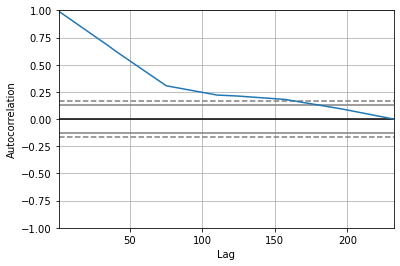

In [11]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

autocorrelation_plot(firm_df)
plt.show()

In [12]:
firm_df.head()

Unnamed: 0   permno  year  pc_1  pc_2  pc_4  pc_5  pc_7  pc_8  pc_14  ...  \
0           0  12060.0  1950   0.0     0     0     0     0     0      0  ...   
1           1  12060.0  1951   0.0     0     0     1     0     0      0  ...   
2           2  12060.0  1952   0.0     0     0     0     0     0      0  ...   
3           3  12060.0  1953   0.0     0     2     0     0     0      0  ...   
4           4  12060.0  1954   0.0     0     1     0     0     0      0  ...   

   pc_715  pc_716  pc_717  pc_718  pc_719  pc_720  pc_725  pc_726  pc_800  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pc_850  
0       0  
1       0  
2       1  
3       0  
4       0  

[5 rows x 401 columns]

In [13]:
firm_df.permno.nunique()

5

In [14]:
firm_df.permno.unique()

array([12060., 12490., 21152., 53727., 64231.])

In [35]:
#liste du portefeuille de patents par entreprise & année
X={}
for i in firm_df.permno.unique():
    X[i] = firm_df[firm_df.permno == i].drop(['Unnamed: 0','permno'],axis =1).set_index('year')
X[12060.0]

pc_1  pc_2  pc_4  pc_5  pc_7  pc_8  pc_14  pc_15  pc_16  pc_19  ...  \
year                                                                  ...   
1950   0.0     0     0     0     0     0      0      1      0      0  ...   
1951   0.0     0     0     1     0     0      0      1      0      0  ...   
1952   0.0     0     0     0     0     0      0      1      0      0  ...   
1953   0.0     0     2     0     0     0      0      1      2      0  ...   
1954   0.0     0     1     0     0     0      0      1      2      0  ...   
...    ...   ...   ...   ...   ...   ...    ...    ...    ...    ...  ...   
2006   6.0     0     0     5     0     2      0      0      0      0  ...   
2007   4.0     0     0     0     0     2      0      0      0      0  ...   
2008   2.0     0     0     2     0     1      0      1      0      0  ...   
2009   7.0     0     0     3     0     1      0      0      0      0  ...   
2010   0.0     0     0     0     0     4      0      2      1      0  ...   

      pc_715  pc_716  pc_717  pc_718  pc_719  pc_720  pc_725  pc_726  pc_800  \
year                                                                           
1950       0       0       0       0       0       0       0       0       0   
1951       0       0       0       0       0       0       0       0       0   
1952       0       0       0       0       0       0       0       0       0   
1953       0       0       0       0       0       0       0       0       0   
1954       0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
2006       3       1       3       0       0       0       0       0       0   
2007       1       0       0       0       0       0       2       0       0   
2008       2       0       0       1       0       0       0       0       0   
2009       1       0       0       0       1       0       0       0       0   
2010       3       0       0       0       2       2       0       1       0   

      pc_850  
year          
1950       0  
1951       0  
1952       1  
1953       0  
1954       0  
...      ...  
2006       0  
2007       0  
2008       0  
2009       0  
2010       0  

[61 rows x 398 columns]

In [36]:
X[12060.0]['pc_1']

year
1950    0.0
1951    0.0
1952    0.0
1953    0.0
1954    0.0
       ... 
2006    6.0
2007    4.0
2008    2.0
2009    7.0
2010    0.0
Name: pc_1, Length: 61, dtype: float64

In [37]:
#M liste du nombre de patent par type & entreprise
M={}
for i in firm_df.permno.unique():
    p={}
    for j in D[i].columns:
        p[j]=D[i][j].sum()
    M[i]=p

In [38]:
M[12060.0]

{'pc_1': 53.0,
 'pc_2': 0,
 'pc_4': 6,
 'pc_5': 36,
 'pc_7': 0,
 'pc_8': 47,
 'pc_14': 1,
 'pc_15': 30,
 'pc_16': 39,
 'pc_19': 1,
 'pc_23': 3,
 'pc_24': 12,
 'pc_26': 1,
 'pc_28': 2,
 'pc_29': 952,
 'pc_30': 11,
 'pc_33': 79,
 'pc_34': 118,
 'pc_36': 0,
 'pc_37': 2,
 'pc_38': 96,
 'pc_40': 15,
 'pc_42': 5,
 'pc_43': 1,
 'pc_44': 7,
 'pc_47': 2,
 'pc_48': 27,
 'pc_49': 31,
 'pc_51': 106,
 'pc_52': 58,
 'pc_53': 15,
 'pc_55': 40,
 'pc_56': 4,
 'pc_57': 3,
 'pc_59': 0,
 'pc_60': 1654,
 'pc_62': 628,
 'pc_63': 0,
 'pc_65': 82,
 'pc_68': 249,
 'pc_70': 3,
 'pc_71': 0,
 'pc_72': 163,
 'pc_73': 726,
 'pc_74': 167,
 'pc_75': 101,
 'pc_76': 5,
 'pc_81': 15,
 'pc_82': 26,
 'pc_83': 23,
 'pc_84': 3,
 'pc_86': 5,
 'pc_87': 1,
 'pc_89': 167,
 'pc_91': 51,
 'pc_92': 10,
 'pc_95': 50,
 'pc_96': 39,
 'pc_99': 59,
 'pc_100': 14,
 'pc_101': 17,
 'pc_102': 38,
 'pc_104': 5,
 'pc_105': 47,
 'pc_106': 62,
 'pc_108': 11,
 'pc_109': 2,
 'pc_110': 32,
 'pc_112': 5,
 'pc_114': 8,
 'pc_116': 30,
 'pc_117': 91,

## I-1/ Patent cumulés


In [56]:
X_cum={}
for i in firm_df.permno.unique():
    X_cum[i]=X[i].sum(axis = 1, skipna = True)

In [55]:
X_cum[12060.0]

year
1950     549.0
1951     600.0
1952     536.0
1953     463.0
1954     339.0
         ...  
2006    1190.0
2007     989.0
2008     988.0
2009    1040.0
2010    1081.0
Length: 61, dtype: float64

entreprise 12060.0


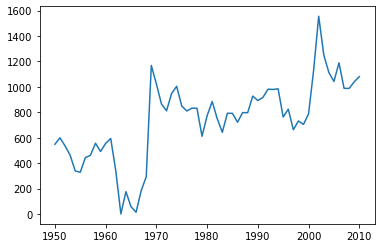

entreprise 12490.0


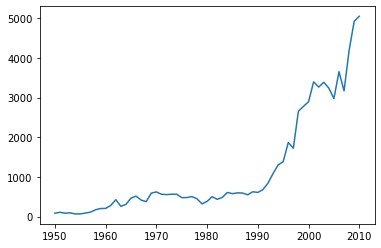

entreprise 21152.0


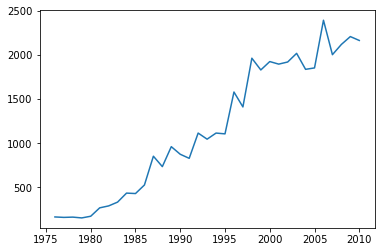

entreprise 53727.0


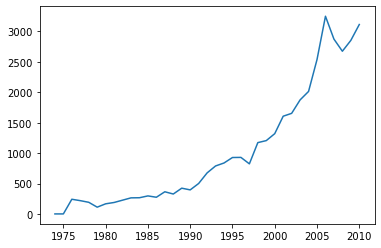

entreprise 64231.0


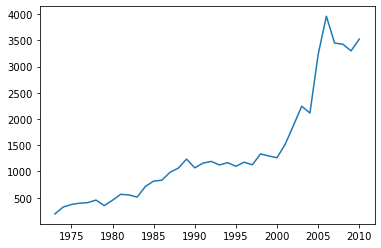

In [57]:
for j in firm_df.permno.unique():
    print('entreprise '+str(j))
    plt.plot(D_cum[j])
    plt.show()

In [42]:
#test stationnarité
for j in firm_df.permno.unique():
    data=X_cum[j].values
    result = adfuller(data)
    print(j)
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

12060.0
p-value: 0.212606
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593
12490.0
p-value: 0.999061
Critical Values:
	1%: -3.566
	5%: -2.920
	10%: -2.598
21152.0
p-value: 0.907401
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616
53727.0
p-value: 1.000000
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630
64231.0
p-value: 0.966762
Critical Values:
	1%: -3.661
	5%: -2.961
	10%: -2.619


In [77]:
#différentie la série
X_diff={}
for j in firm_df.permno.unique():
    X = X_cum[12060.0].values
    diff = list()
    for i in range(1, len(X)):
        value = X[i] - X[i - 1]
        diff.append(value)
    X_diff[j] = pd.Series(diff, index=X_cum[12060.0][1:].index)


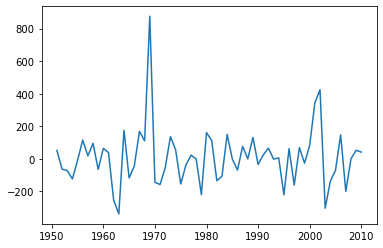

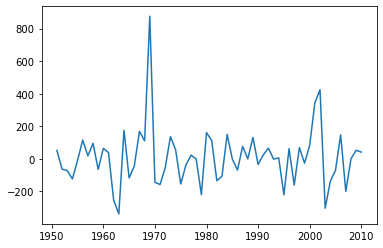

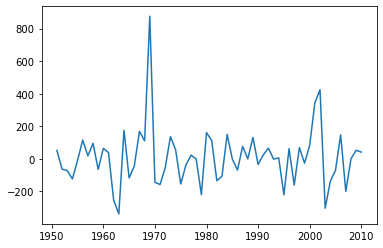

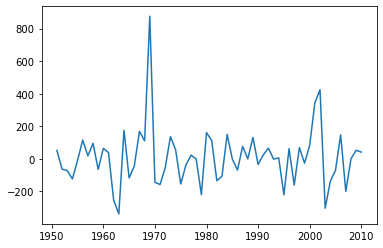

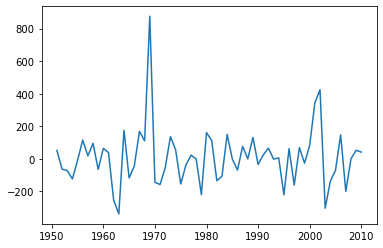

In [80]:
#on visualise, ça a l'air de marcher
for j in firm_df.permno.unique():
    plt.plot(X_diff[j])
    plt.show()

In [74]:
X_cum[12060.0].index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010],
           dtype='int64', name='year')

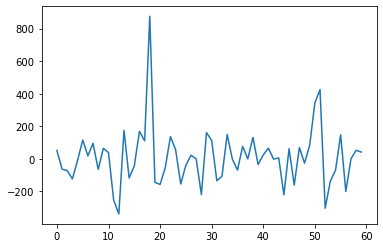

In [73]:
X = X_cum[12060.0].values
diff = list()
for i in range(1, len(X)):
	value = X[i] - X[i - 1]
	diff.append(value)
plt.plot(diff)
plt.show()

In [65]:
X_cum[12060.0].iloc[0]

549.0

In [53]:
X_diff[12060.0]

year
1950     549.0
1951     600.0
1952     536.0
1953     463.0
1954    -124.0
         ...  
2006    1190.0
2007     989.0
2008     988.0
2009    1040.0
2010    1081.0
Length: 61, dtype: float64

entreprise 12060.0


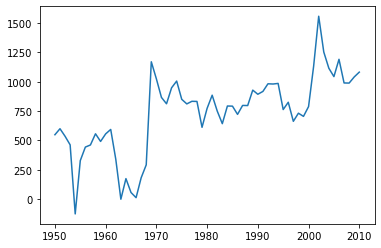

entreprise 12490.0


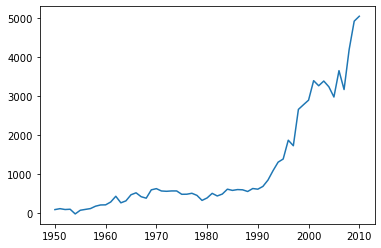

entreprise 21152.0


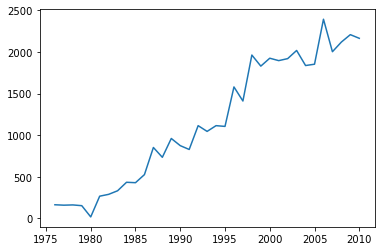

entreprise 53727.0


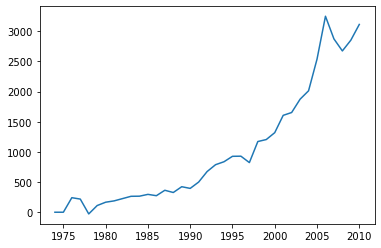

entreprise 64231.0


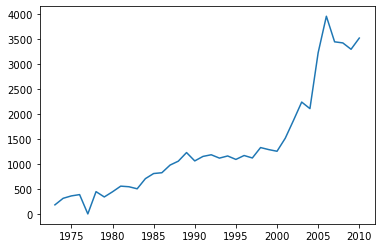

In [58]:
for j in firm_df.permno.unique():
    print('entreprise '+str(j))
    plt.plot(X_diff[j])
    plt.show()

In [59]:
X_diff[12060.0]

year
1950     549.0
1951     600.0
1952     536.0
1953     463.0
1954    -124.0
         ...  
2006    1190.0
2007     989.0
2008     988.0
2009    1040.0
2010    1081.0
Length: 61, dtype: float64

In [ ]:
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

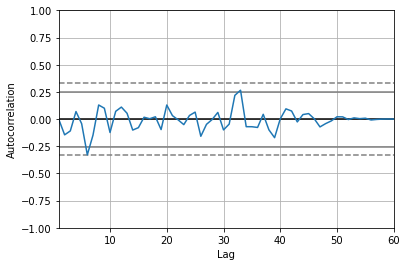

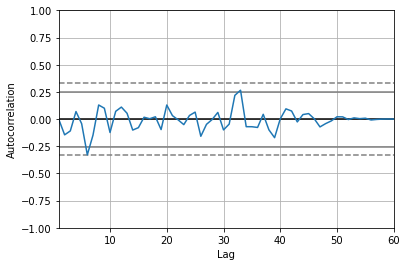

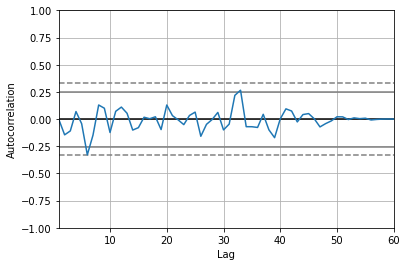

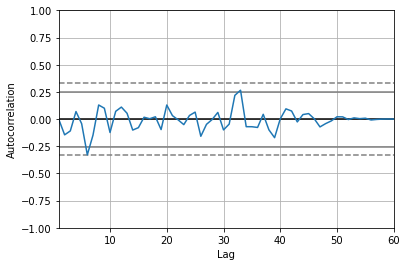

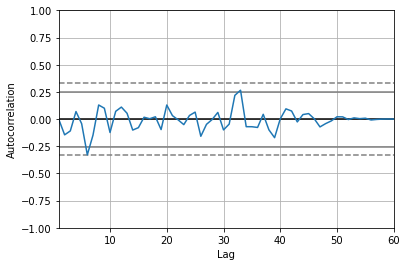

In [81]:
for i in firm_df.permno.unique():
    autocorrelation_plot(X_diff[i])
    plt.show()

In [89]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(exog, order=order).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [90]:
#test AIC pour déterminer 
ps = range(0, 8, 1)
d = 1
qs = range(0, 8, 1)
# Create a list with all possible combination of parameters
parameters = []
for k in ps:
    for l in qs:
        parameters.append([k,l])
order_list = []
for each in parameters:
    each = list(each)
    each.insert(1, 1)
    each = tuple(each)
    order_list.append(each)
    
result_df = optimize_ARIMA(order_list, exog=X_diff[12060.0])
result_df

<ipython-input-89-0c18f4fa5286>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [96]:
X_diff[12060.0]

year
1951     51.0
1952    -64.0
1953    -73.0
1954   -124.0
1955    -10.0
1956    115.0
1957     18.0
1958     95.0
1959    -65.0
1960     64.0
1961     38.0
1962   -254.0
1963   -339.0
1964    175.0
1965   -118.0
1966    -44.0
1967    169.0
1968    110.0
1969    876.0
1970   -145.0
1971   -158.0
1972    -54.0
1973    136.0
1974     57.0
1975   -155.0
1976    -39.0
1977     22.0
1978     -1.0
1979   -220.0
1980    161.0
1981    112.0
1982   -135.0
1983   -107.0
1984    150.0
1985     -1.0
1986    -70.0
1987     76.0
1988     -1.0
1989    131.0
1990    -35.0
1991     24.0
1992     65.0
1993     -2.0
1994      5.0
1995   -222.0
1996     62.0
1997   -162.0
1998     69.0
1999    -27.0
2000     83.0
2001    343.0
2002    425.0
2003   -304.0
2004   -138.0
2005    -71.0
2006    147.0
2007   -201.0
2008     -1.0
2009     52.0
2010     41.0
dtype: float64

In [86]:
 range(0, 8, 1)

range(0, 8)

## I-2/ Patent dissociés

In [22]:
#ensemble des 5 premieres classes de patents par entreprise
List_max5={}
for i in firm_df.permno.unique(): 
    max_5=sorted(M[i], key=M[i].get, reverse=True)[:5]
    List_max5[i]=max_5

In [23]:
List_max5[12060.0]

['pc_60', 'pc_378', 'pc_324', 'pc_528', 'pc_428']

Visualisation

entreprise 12060.0
patent pc_60


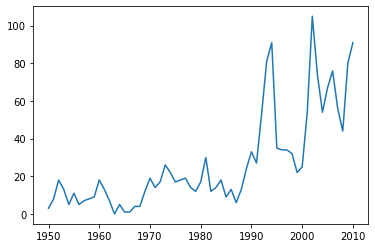

patent pc_378


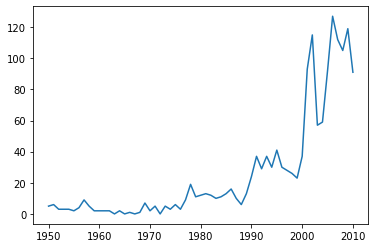

patent pc_324


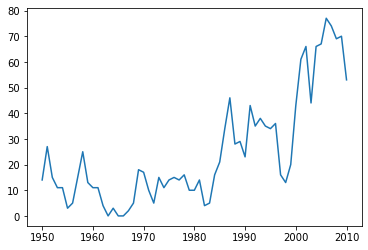

patent pc_528


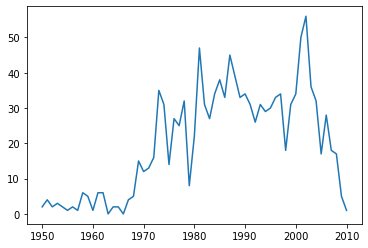

patent pc_428


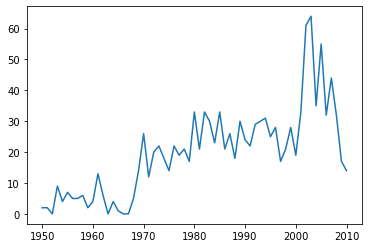

entreprise 12490.0
patent pc_438


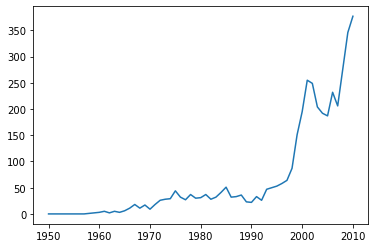

patent pc_709


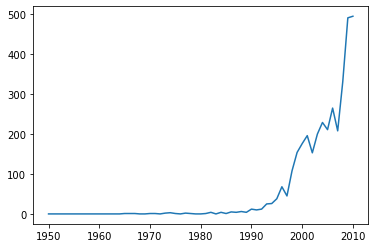

patent pc_711


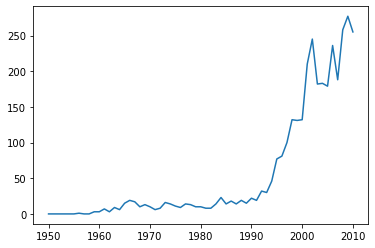

patent pc_257


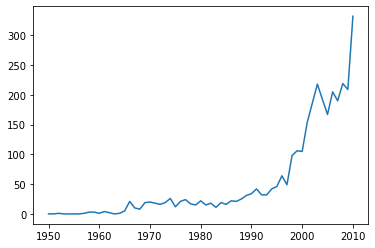

patent pc_1


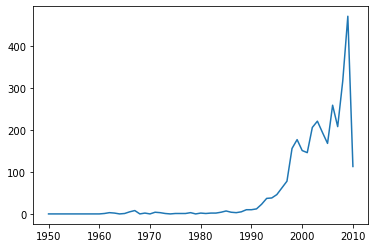

entreprise 21152.0
patent pc_399


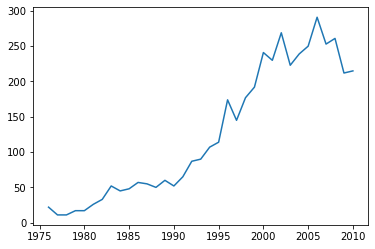

patent pc_347


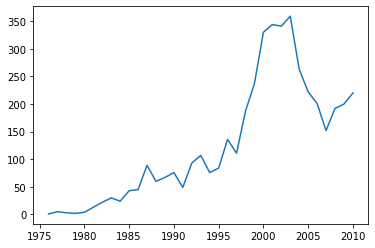

patent pc_358


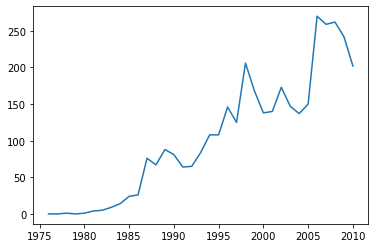

patent pc_396


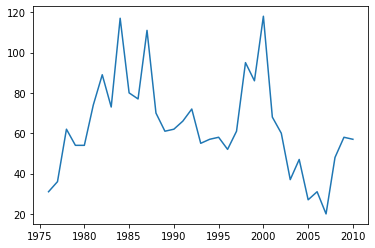

patent pc_348


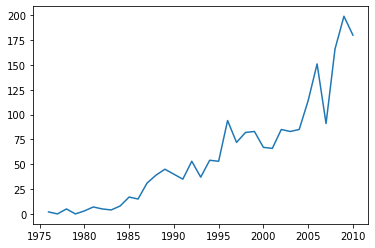

entreprise 53727.0
patent pc_257


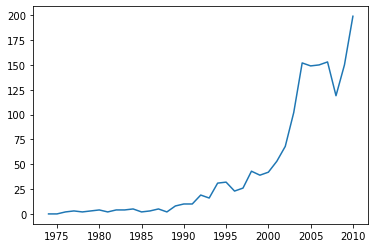

patent pc_369


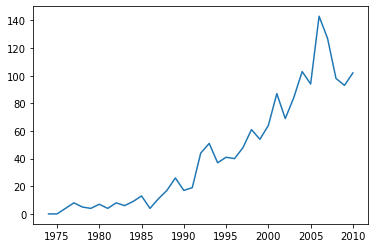

patent pc_438


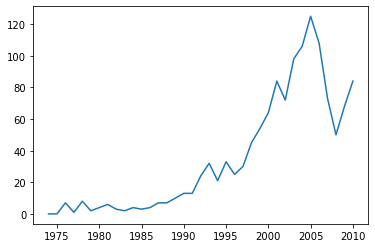

patent pc_348


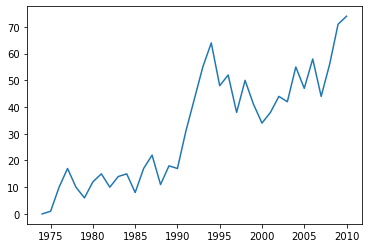

patent pc_429


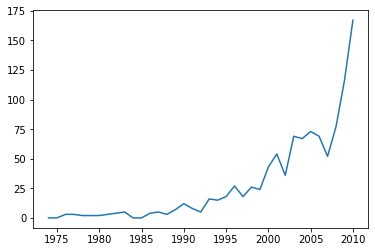

entreprise 64231.0
patent pc_257


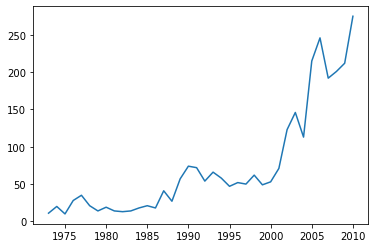

patent pc_360


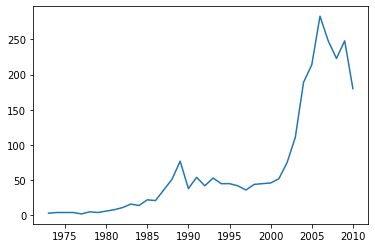

patent pc_365


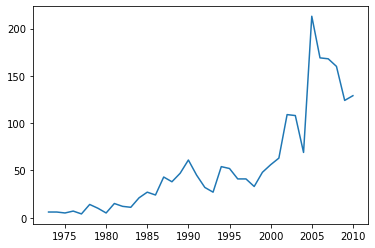

patent pc_438


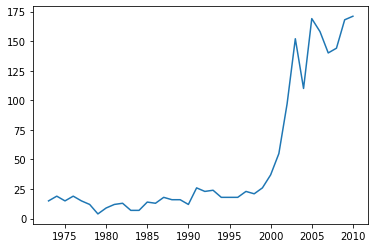

patent pc_711


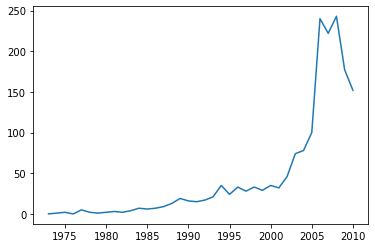

In [24]:
#on visualise l'évolution du nb de patents pour l'entreprise 12060
for j in firm_df.permno.unique():
    print('entreprise '+str(j))
    for k in List_max5[j]:
        print('patent '+str(k))
        plt.plot(D[j][k])
        plt.show()

on remarque une tendance croissante

Tests stationnarité, de tendance

In [24]:
#test stationnarité
for k in List_max5[12060.0]:
    series=D[12060.0][k]
    X = series.values
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.032702
p-value: 0.994599
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597
ADF Statistic: 5.368330
p-value: 1.000000
Critical Values:
	1%: -3.568
	5%: -2.921
	10%: -2.599
ADF Statistic: -1.519069
p-value: 0.524058
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593
ADF Statistic: -2.393245
p-value: 0.143652
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593
ADF Statistic: -2.059306
p-value: 0.261189
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594


Modèles ARMA

In [10]:
def arma(comp,pat,order=(4,1,0)):
    autocorrelation_plot(D[comp][pat])
    plt.show()
    model = ARIMA(D[comp][pat], order)
    model_fit = model.fit()
    print(model_fit.summary())
    residuals = model_fit.resid
    residuals.plot()
    plt.show()
    residuals.plot(kind='kde')
    plt.show()
    print(residuals.describe())

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                  pc_60   No. Observations:                   61
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -241.028
Date:                Mon, 03 May 2021   AIC                            492.056
Time:                        16:55:51   BIC                            502.528
Sample:                             0   HQIC                           496.152
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0246      0.110      0.224      0.823      -0.190       0.239
ar.L2         -0.3712      0.140     -2.655      0.008      -0.645      -0.097
ar.L3         -0.0718      0.157     -0.458      0.6

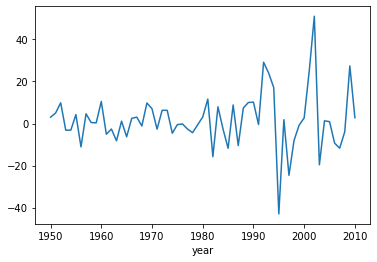

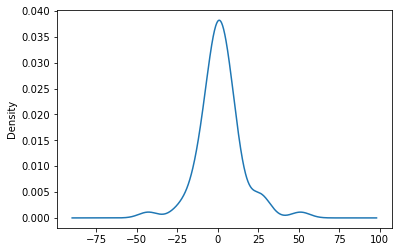

count    61.000000
mean      1.589405
std      13.302549
min     -43.001542
25%      -3.950145
50%       0.881206
75%       7.018845
max      51.012284
dtype: float64


In [11]:
model = ARIMA(D[12060.0]['pc_60'], order=(4,1,0))
model_fit = model.fit()
print(model_fit.summary())
residuals = model_fit.resid
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:                  pc_60   No. Observations:                   61
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -239.311
Date:                Mon, 03 May 2021   AIC                            490.621
Time:                        16:55:51   BIC                            503.187
Sample:                             0   HQIC                           495.537
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0638      0.117      0.545      0.586      -0.166       0.293
ar.L2         -0.3918      0.142     -2.750      0.006      -0.671      -0.113
ar.L3         -0.1485      0.162     -0.915      0.3

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


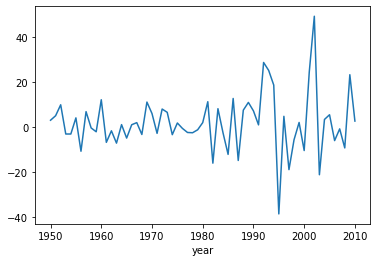

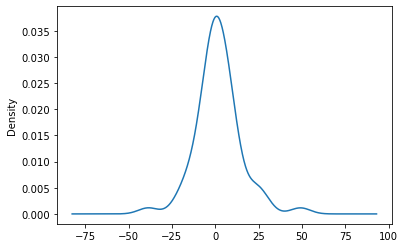

count    61.000000
mean      1.842717
std      12.859845
min     -38.608527
25%      -3.330692
50%       1.048319
75%       7.146004
max      49.183500
dtype: float64


In [12]:
model = ARIMA(D[12060.0]['pc_60'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
residuals = model_fit.resid
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [13]:
X=D[12060.0]['pc_60'].values

In [14]:
result = adfuller(X)
result

(1.032702392301869,
 0.9945992885514686,
 7,
 53,
 {'1%': -3.560242358792829,
  '5%': -2.9178502070837,
  '10%': -2.5967964150943397},
 397.1813417987515)

In [15]:
print('ADF Statistic: %f' % result[0])

ADF Statistic: 1.032702


In [16]:
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

p-value: 0.994599
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597


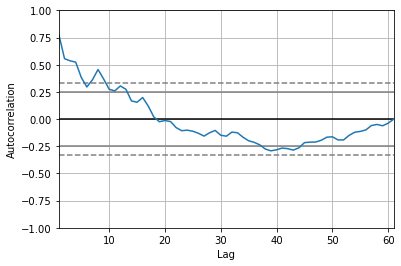

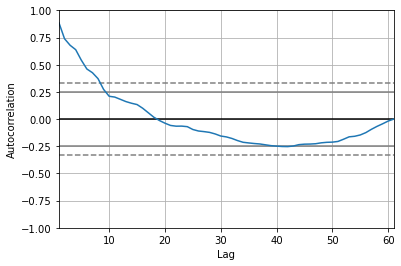

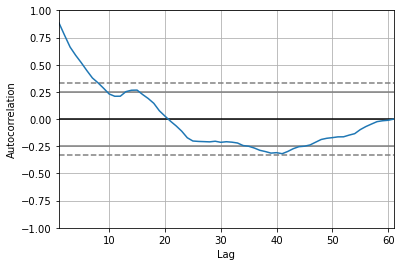

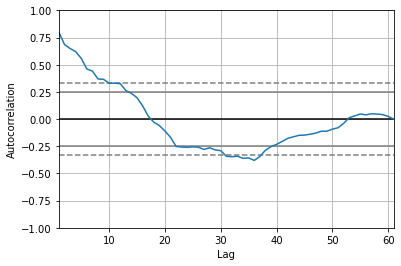

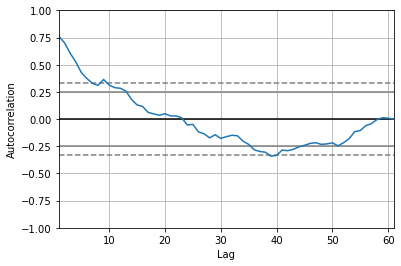

In [17]:
for i in max_5:
    autocorrelation_plot(D[12060.0][i])
    plt.show()

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                  pc_60   No. Observations:                   61
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -239.311
Date:                Mon, 03 May 2021   AIC                            490.621
Time:                        16:55:53   BIC                            503.187
Sample:                             0   HQIC                           495.537
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0638      0.117      0.545      0.586      -0.166       0.293
ar.L2         -0.3918      0.142     -2.750      0.006      -0.671      -0.113
ar.L3         -0.1485      0.162     -0.915      0.3

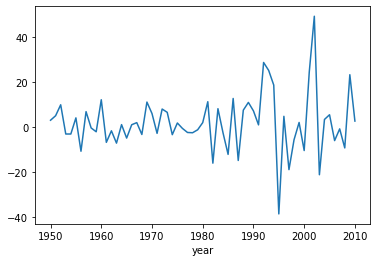

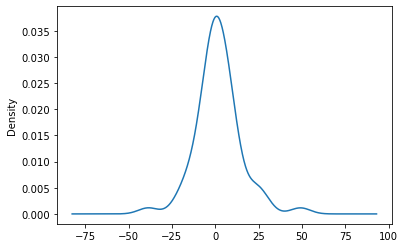

count    61.000000
mean      1.842717
std      12.859845
min     -38.608527
25%      -3.330692
50%       1.048319
75%       7.146004
max      49.183500
dtype: float64
                               SARIMAX Results                                
Dep. Variable:                 pc_378   No. Observations:                   61
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -235.630
Date:                Mon, 03 May 2021   AIC                            483.260
Time:                        16:55:54   BIC                            495.826
Sample:                             0   HQIC                           488.175
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0718      0.099      0.723

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


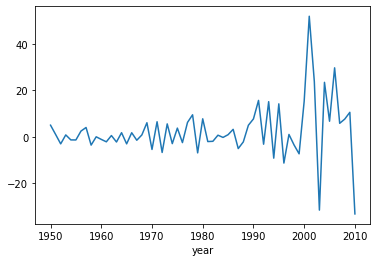

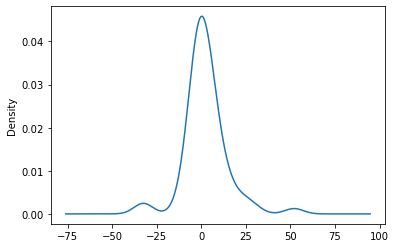

count    61.000000
mean      2.402680
std      11.988372
min     -33.316606
25%      -2.522122
50%       0.797549
75%       6.194936
max      52.045860
dtype: float64
                               SARIMAX Results                                
Dep. Variable:                 pc_324   No. Observations:                   61
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -218.114
Date:                Mon, 03 May 2021   AIC                            448.228
Time:                        16:55:54   BIC                            460.795
Sample:                             0   HQIC                           453.144
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1145      0.153     -0.748

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


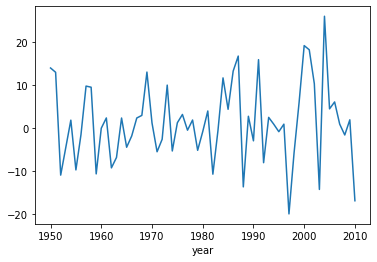

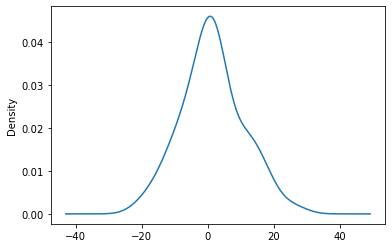

count    61.000000
mean      1.322345
std       9.256564
min     -19.951179
25%      -4.532236
50%       1.223173
75%       6.012265
max      26.038022
dtype: float64
                               SARIMAX Results                                
Dep. Variable:                 pc_528   No. Observations:                   61
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -213.153
Date:                Mon, 03 May 2021   AIC                            438.305
Time:                        16:55:54   BIC                            450.871
Sample:                             0   HQIC                           443.220
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3230      0.145     -2.230

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


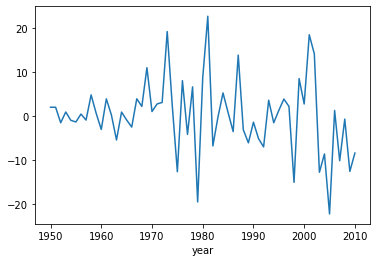

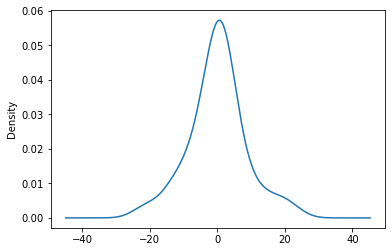

count    61.000000
mean      0.073973
std       8.429609
min     -22.298539
25%      -3.548561
50%       0.599627
75%       3.598841
max      22.726751
dtype: float64
                               SARIMAX Results                                
Dep. Variable:                 pc_428   No. Observations:                   61
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -216.457
Date:                Mon, 03 May 2021   AIC                            444.914
Time:                        16:55:55   BIC                            457.480
Sample:                             0   HQIC                           449.829
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4288      0.124     -3.455

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


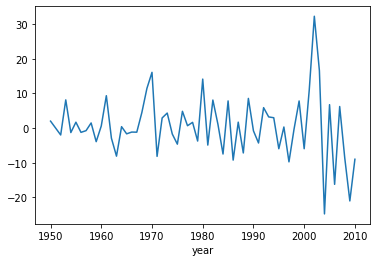

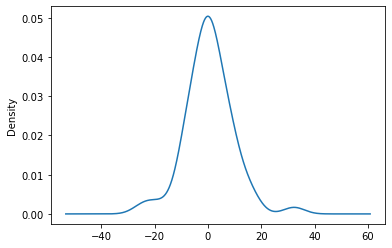

count    61.000000
mean      0.429348
std       8.900860
min     -24.807847
25%      -4.315900
50%       0.303937
75%       4.838849
max      32.304300
dtype: float64


In [18]:
for i in max_5:
# fit model
    model = ARIMA(D[12060.0][i], order=(5,1,0))
    model_fit = model.fit()
    # summary of fit model
    print(model_fit.summary())
    # line plot of residuals
    residuals = model_fit.resid
    residuals.plot()
    plt.show()
    # density plot of residuals
    residuals.plot(kind='kde')
    plt.show()
    # summary stats of residuals
    print(residuals.describe())

In [19]:
'pc_150' in D[12060.0].columns

False

In [20]:
len(D[12060.0].columns)


398

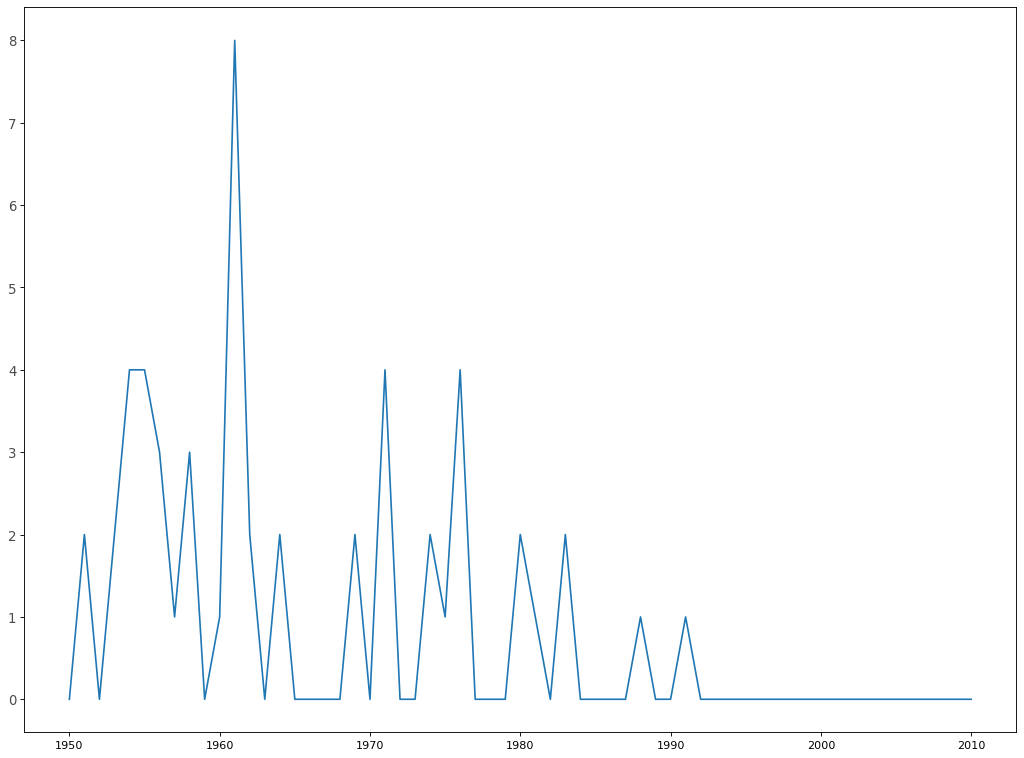

In [21]:
plt.figure(figsize=(16,12), dpi= 80)
plt.plot(D[12060.0]['pc_140'])

plt.yticks(fontsize=12, alpha=.7)
plt.show()

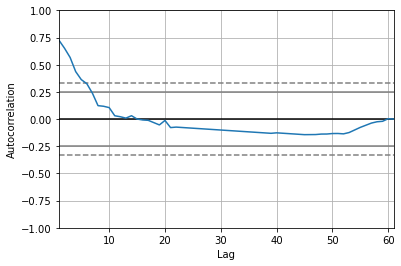

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


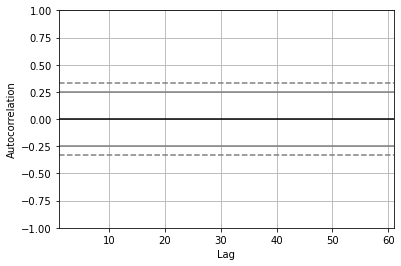

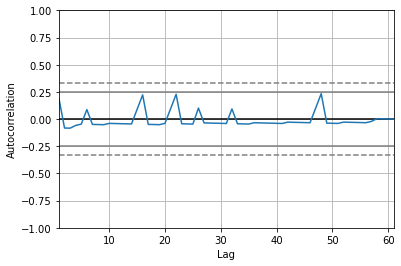

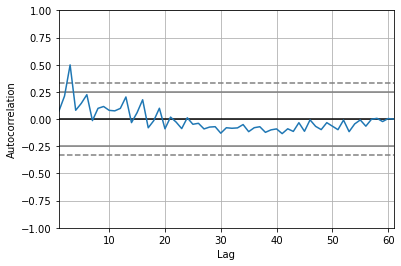

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


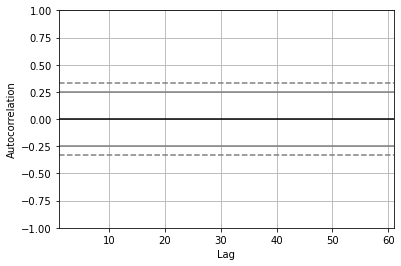

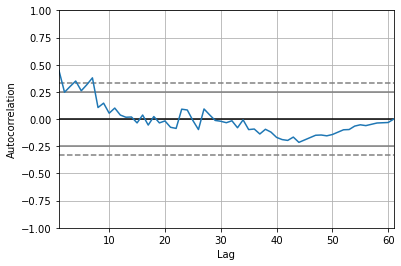

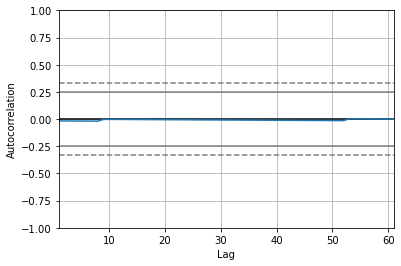

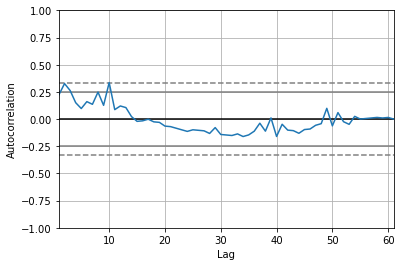

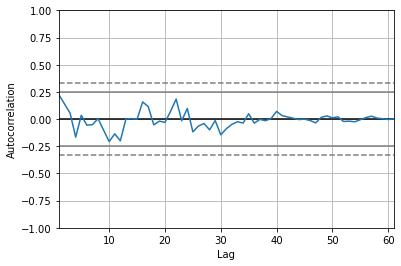

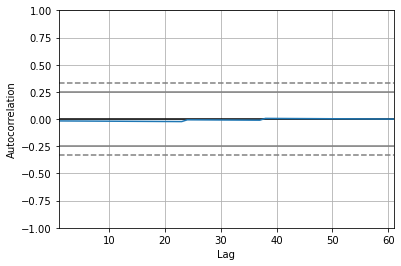

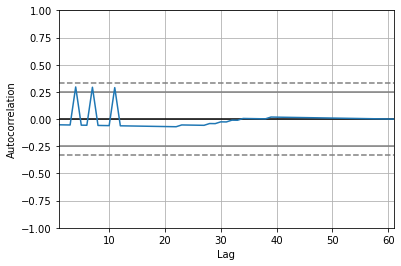

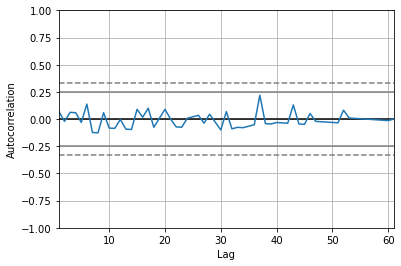

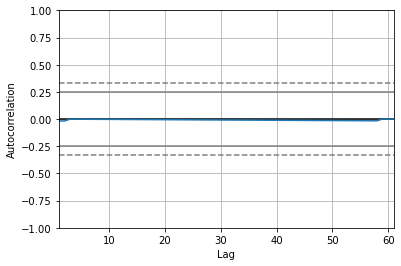

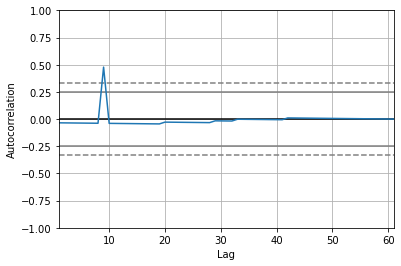

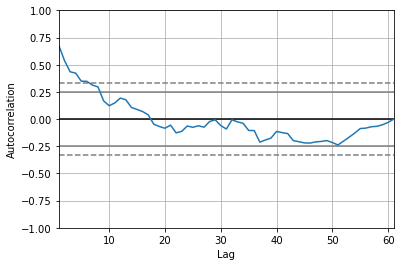

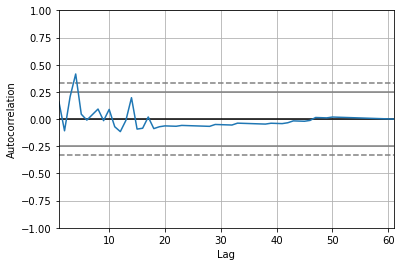

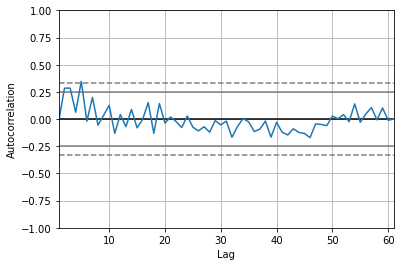

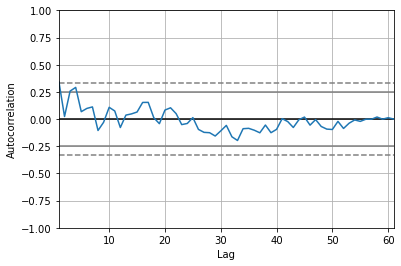

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


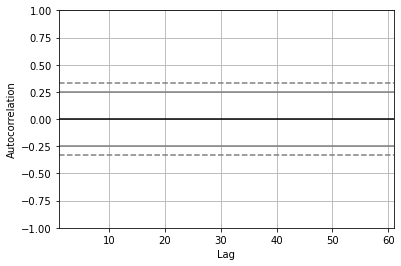

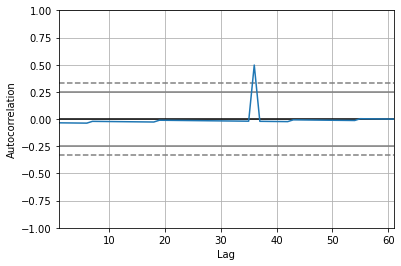

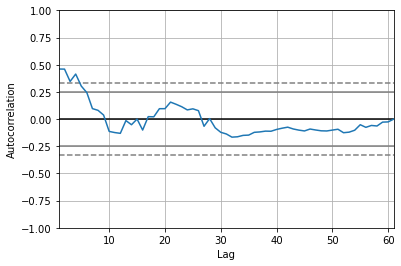

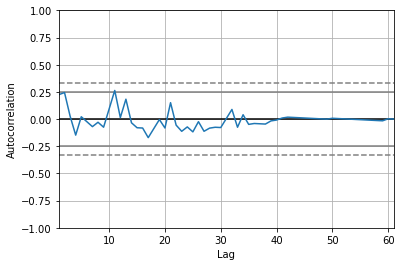

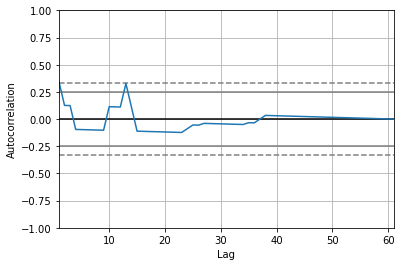

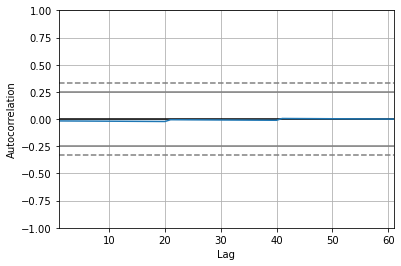

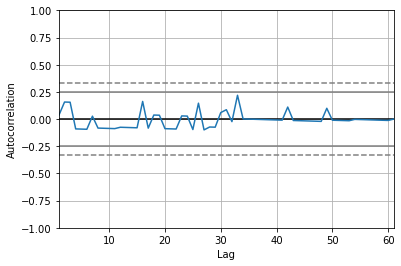

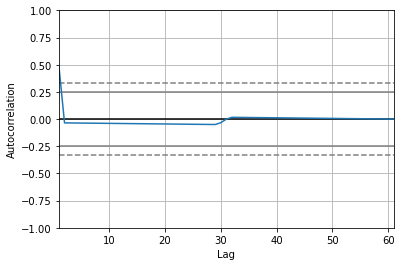

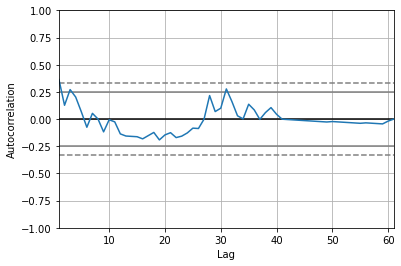

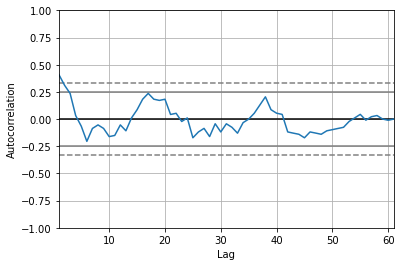

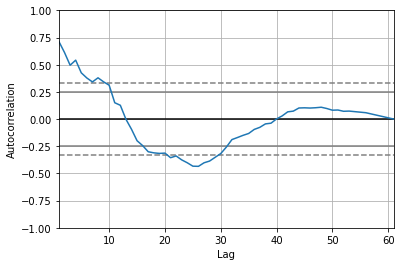

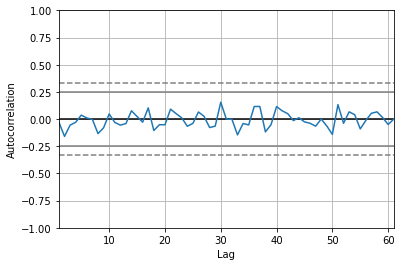

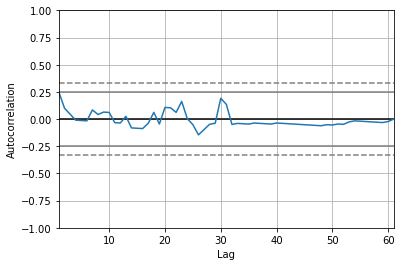

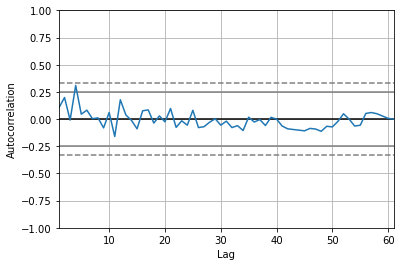

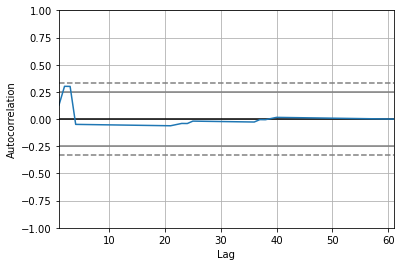

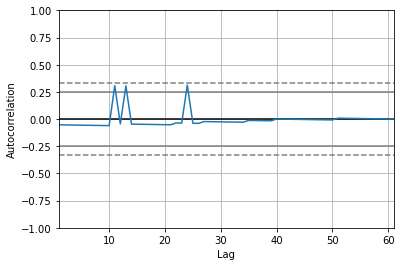

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


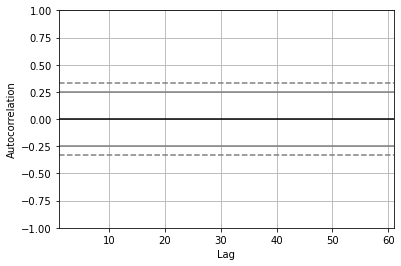

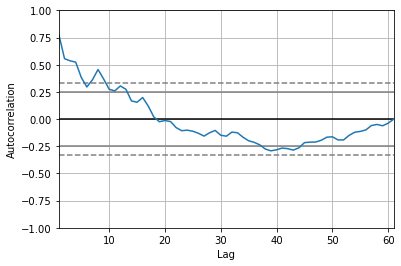

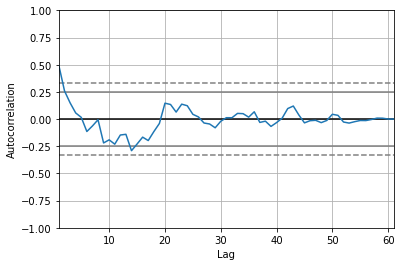

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


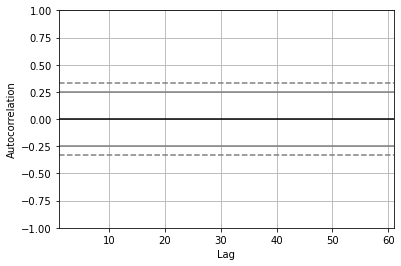

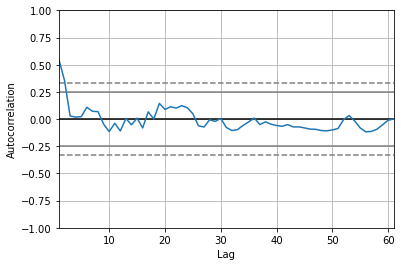

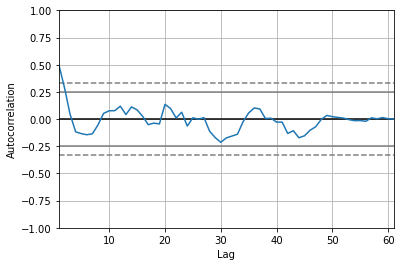

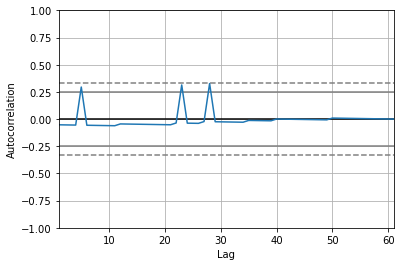

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


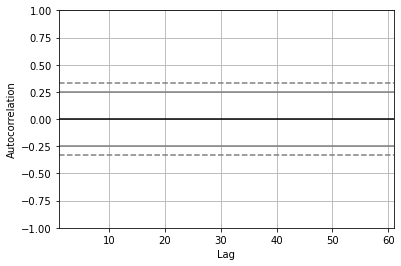

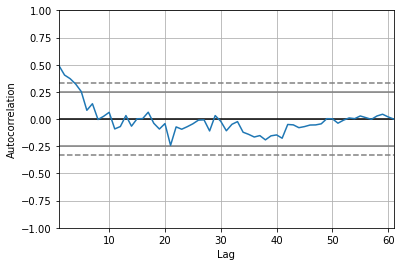

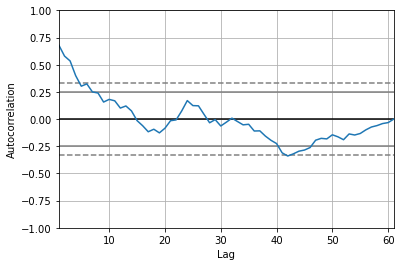

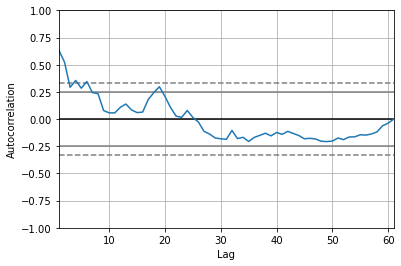

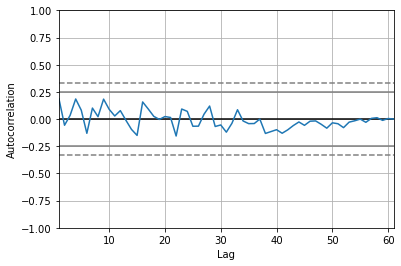

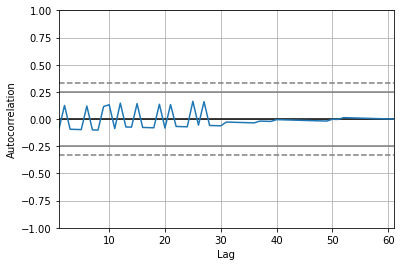

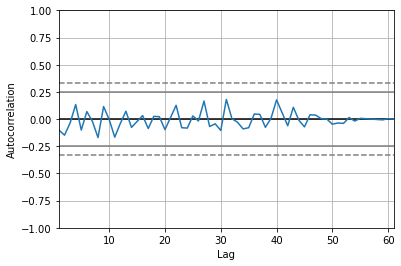

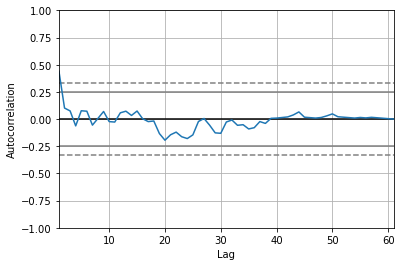

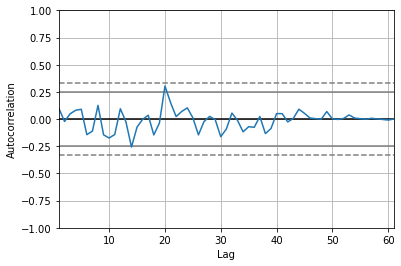

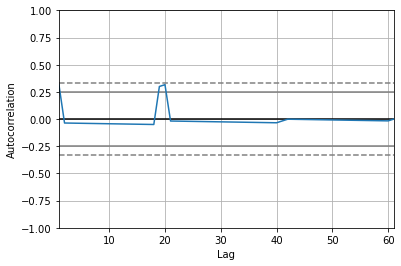

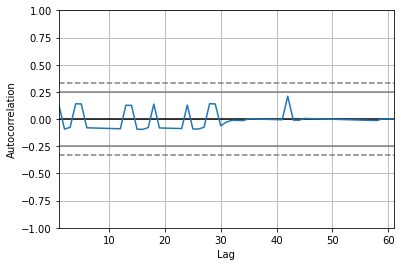

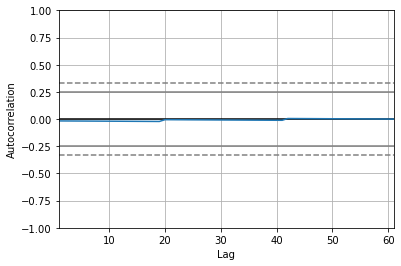

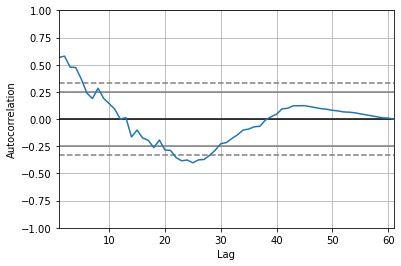

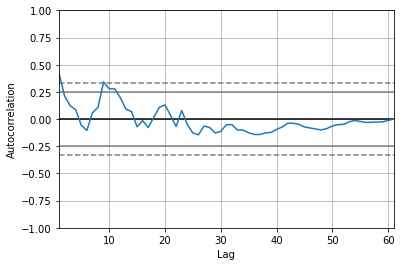

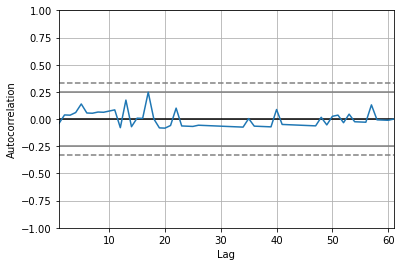

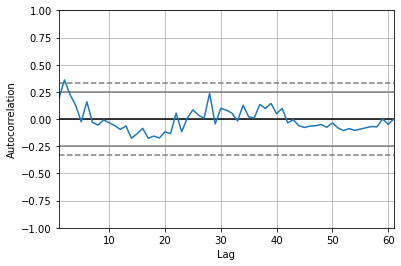

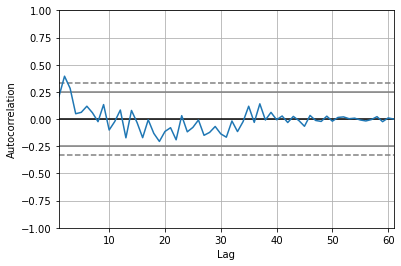

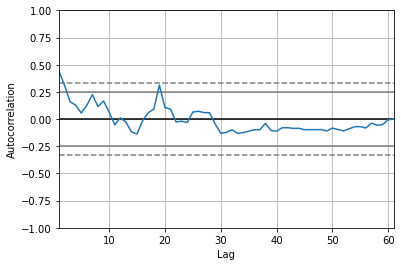

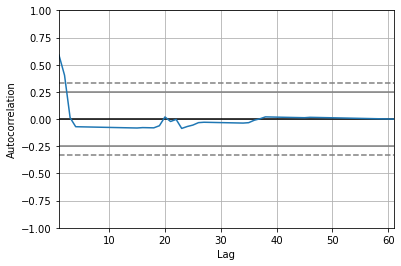

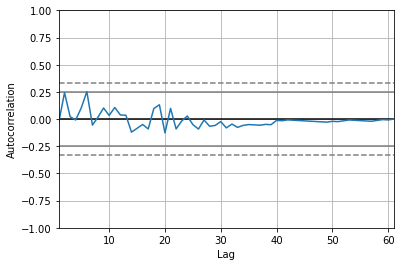

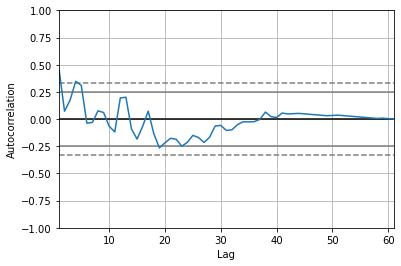

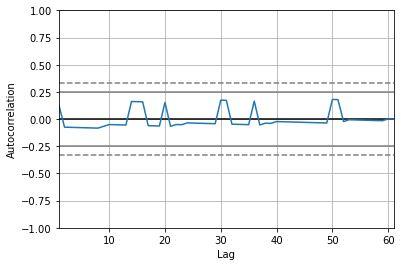

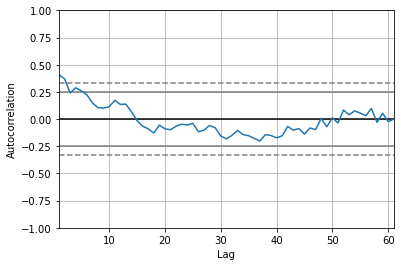

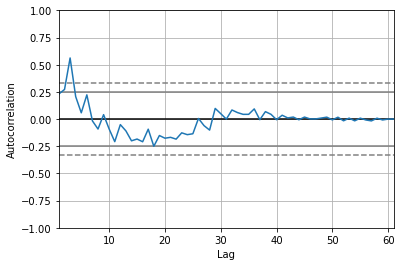

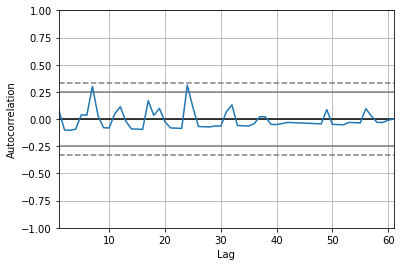

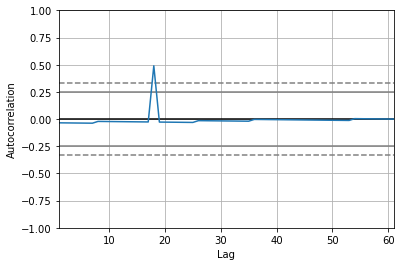

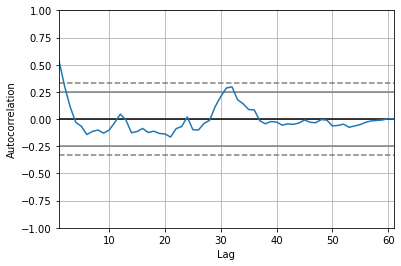

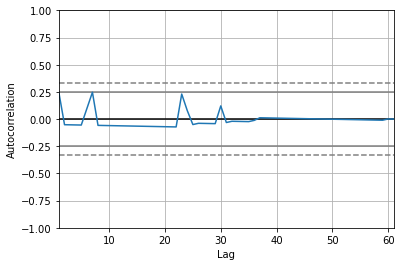

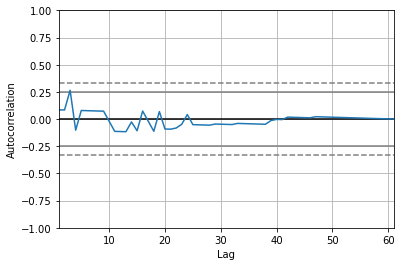

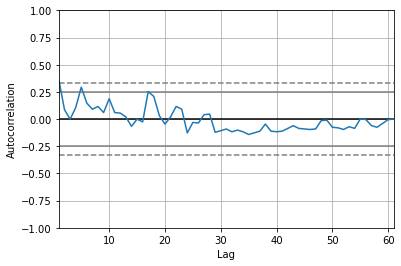

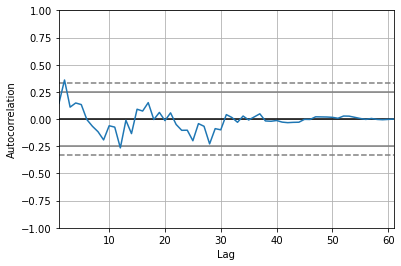

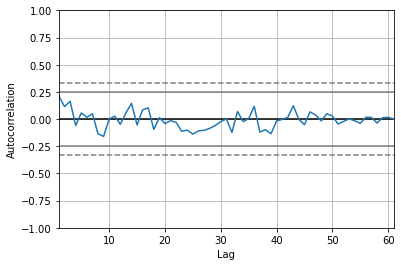

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


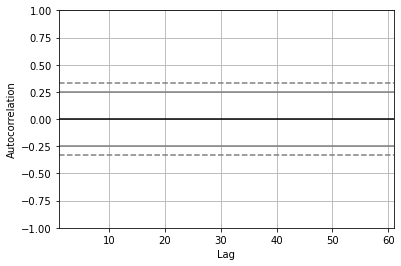

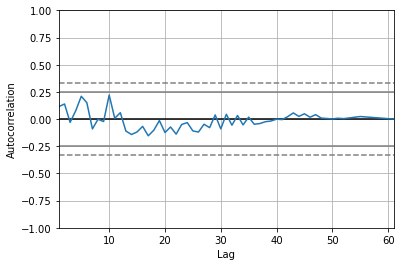

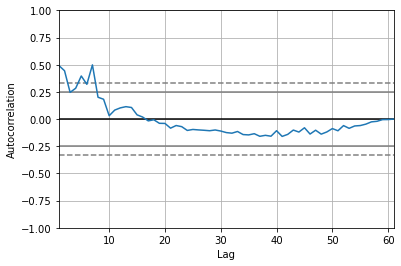

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


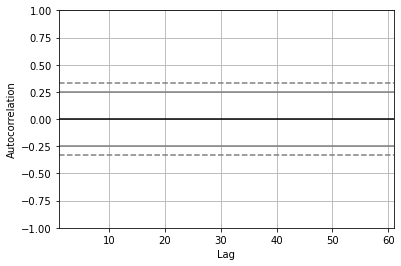

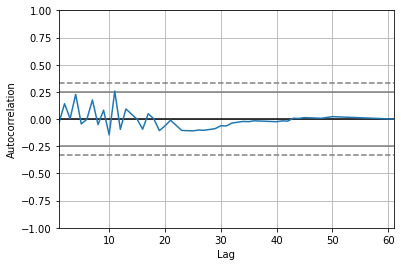

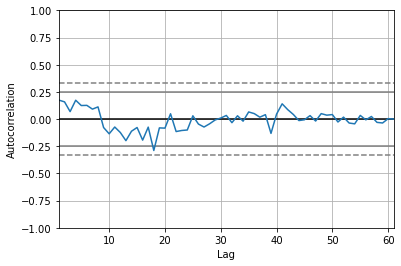

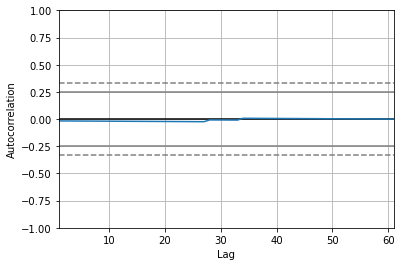

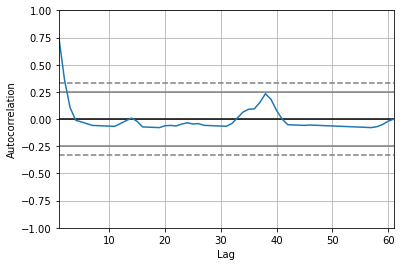

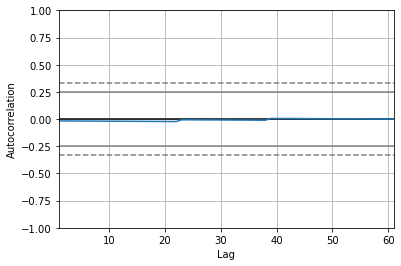

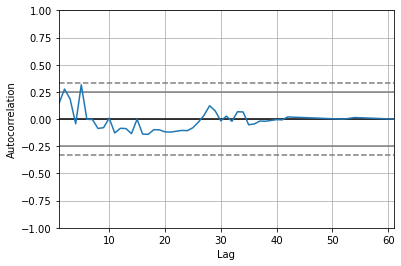

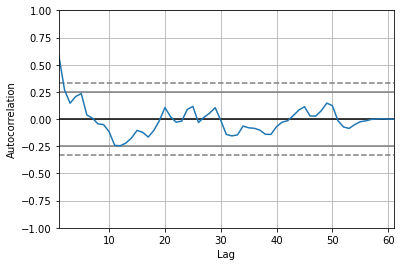

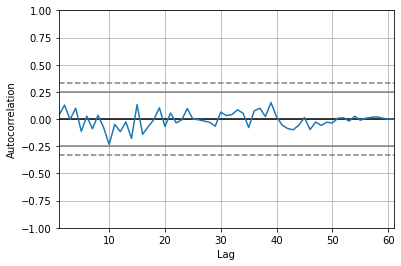

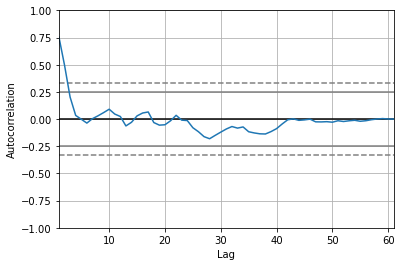

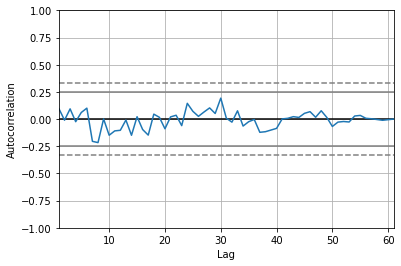

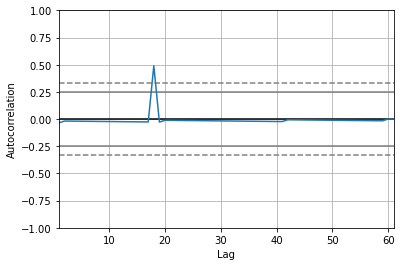

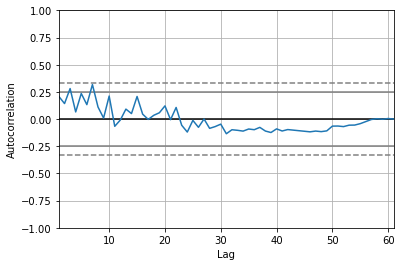

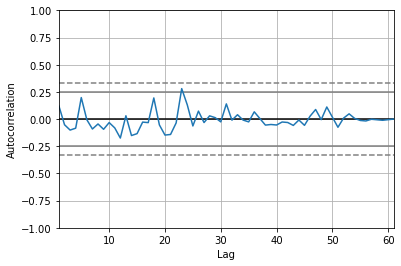

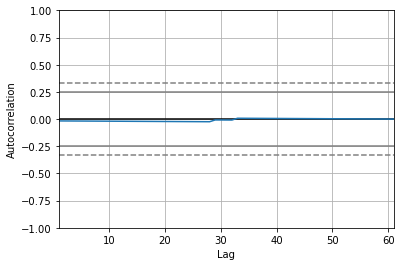

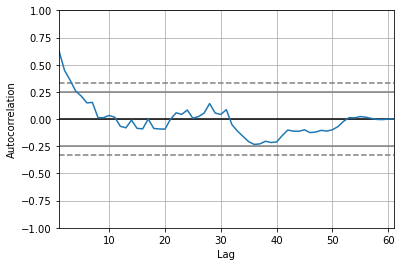

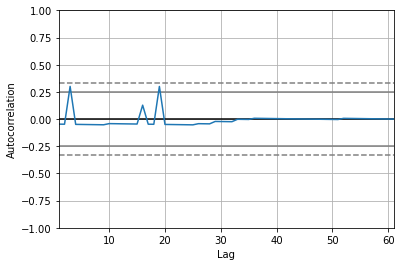

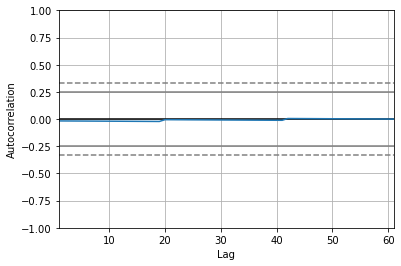

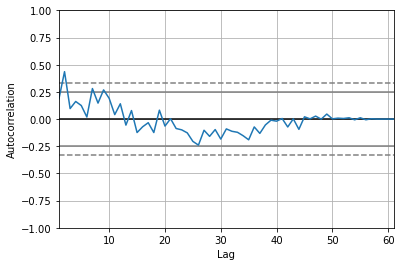

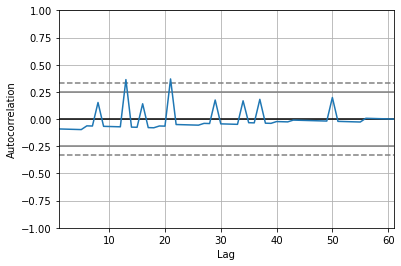

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


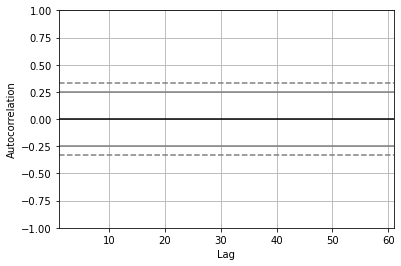

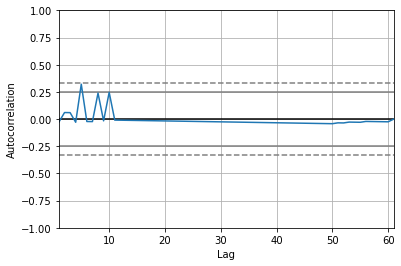

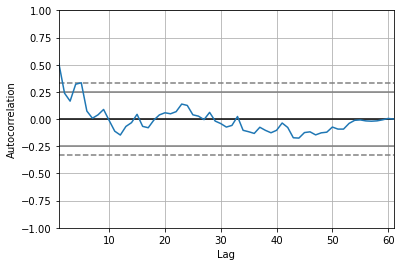

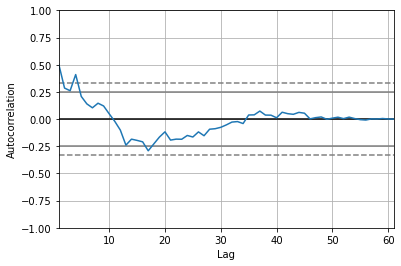

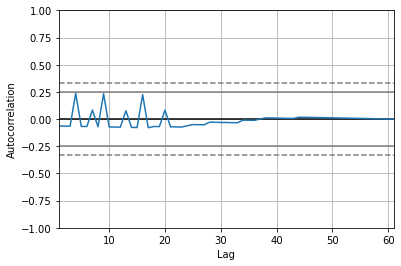

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


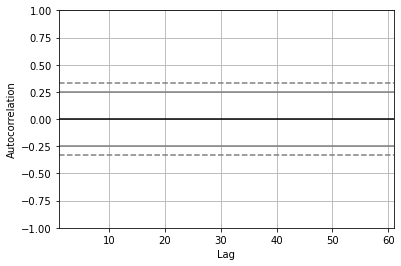

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


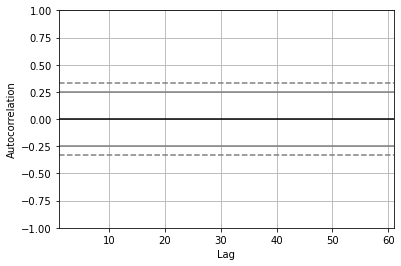

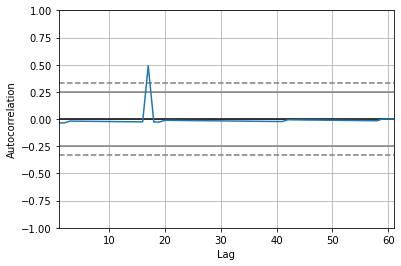

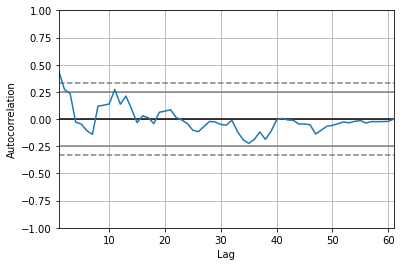

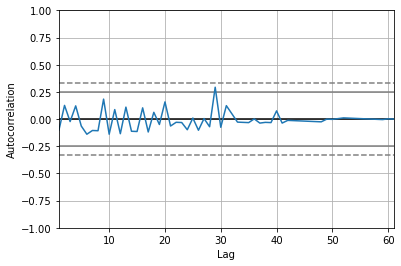

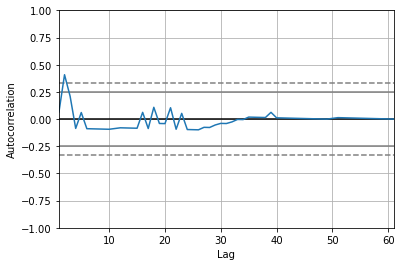

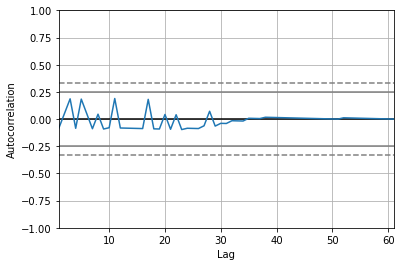

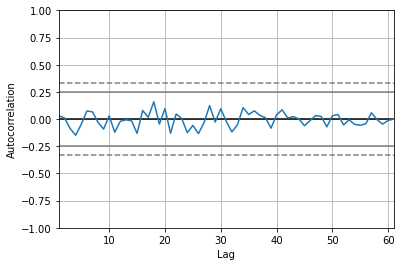

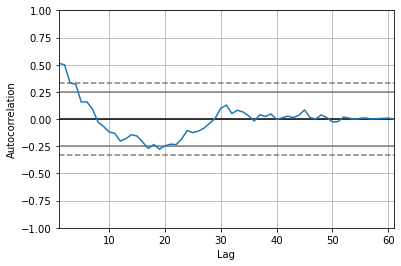

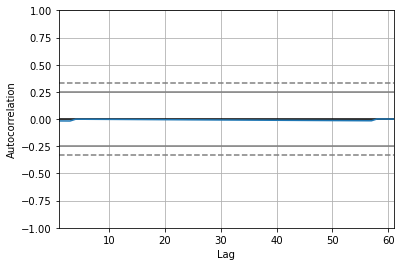

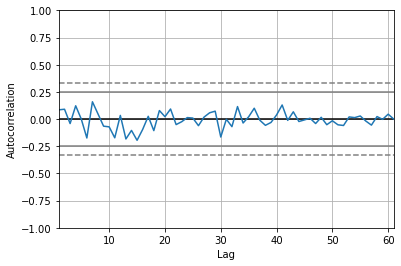

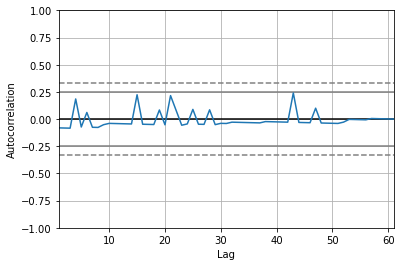

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


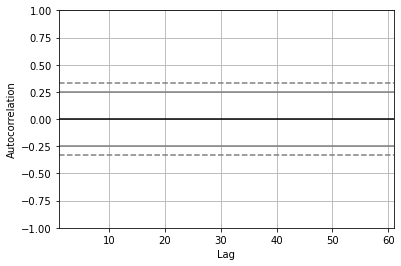

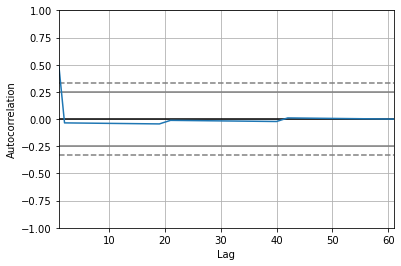

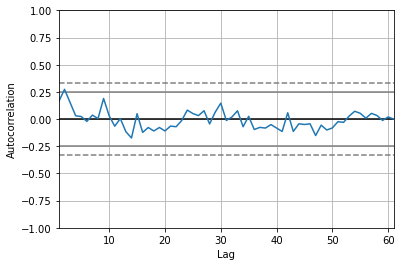

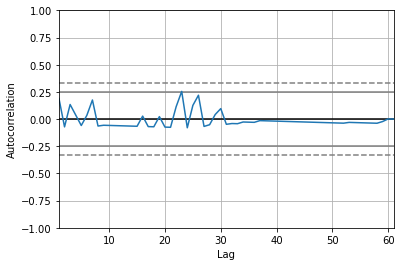

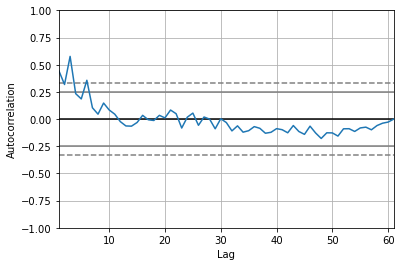

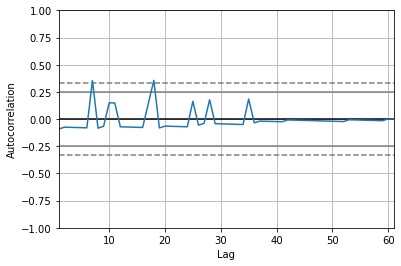

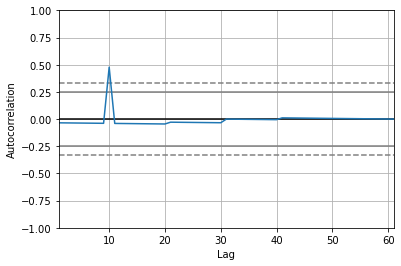

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


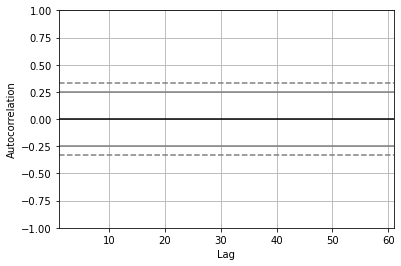

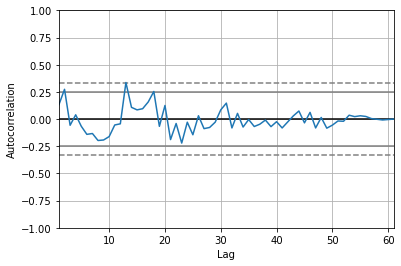

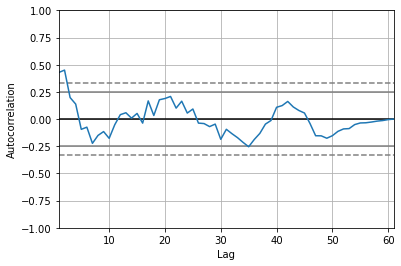

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


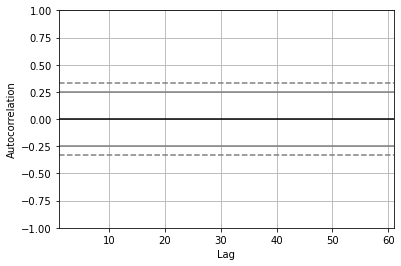

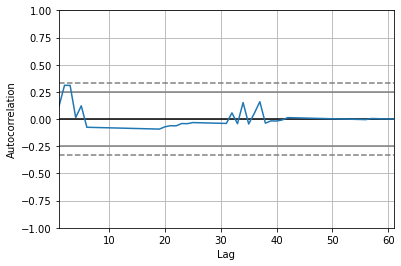

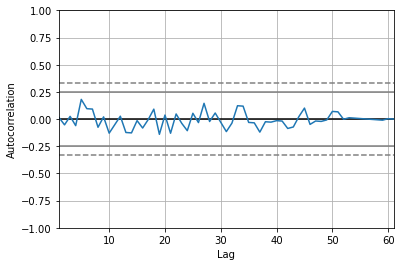

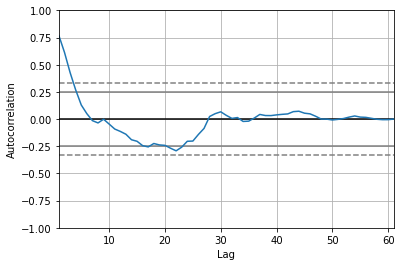

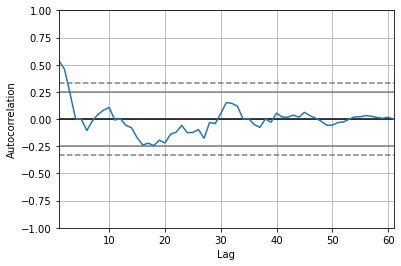

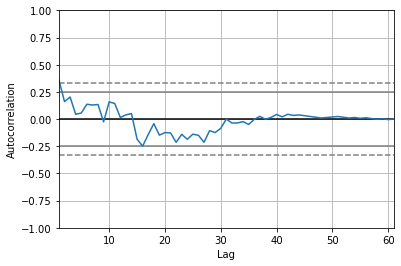

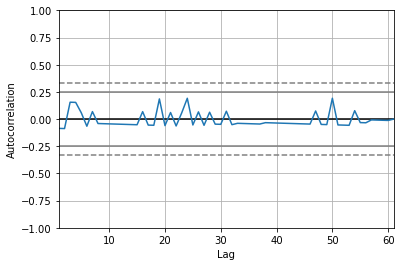

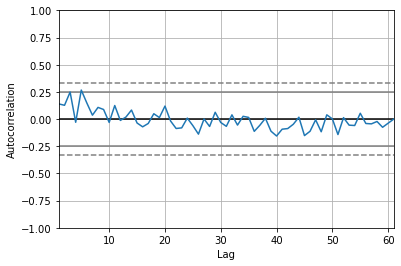

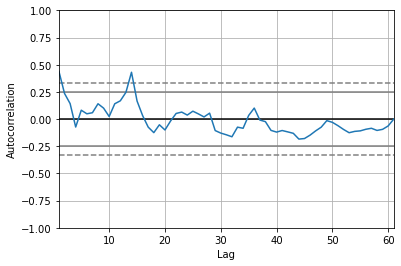

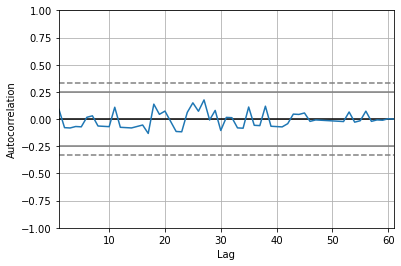

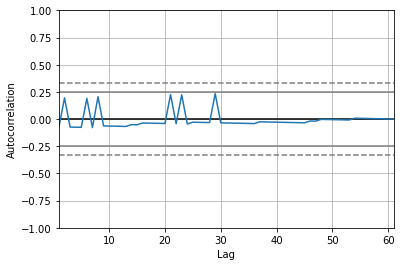

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


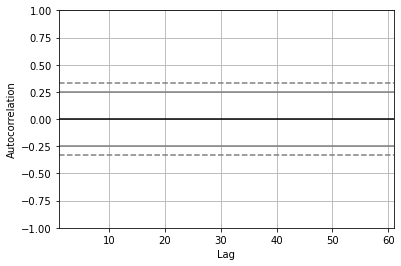

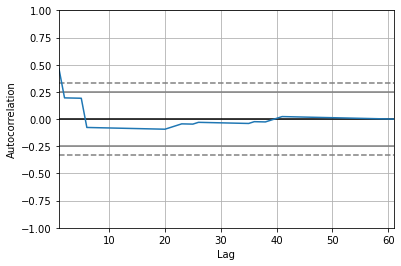

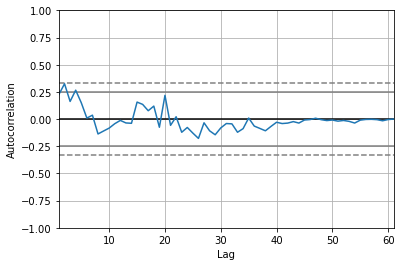

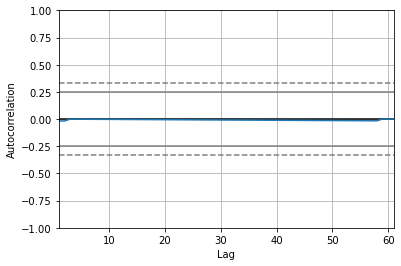

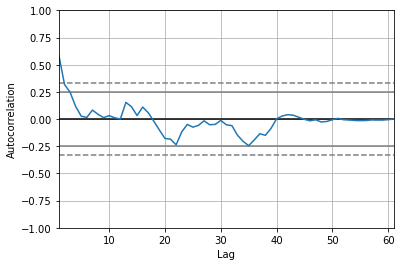

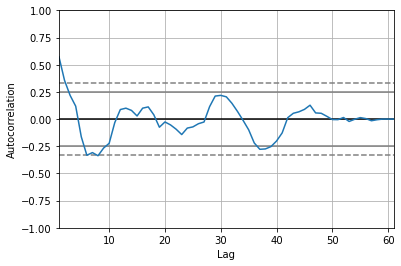

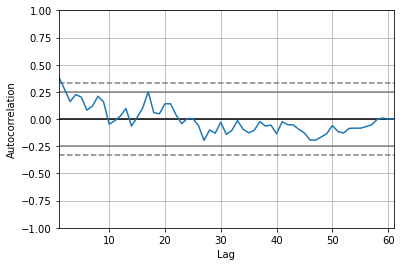

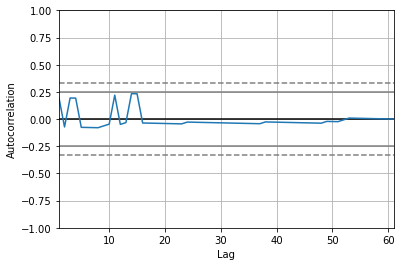

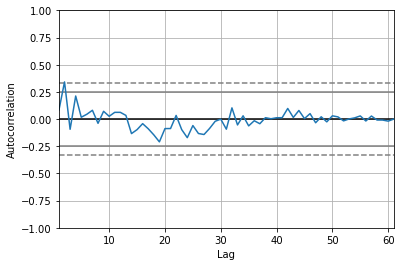

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


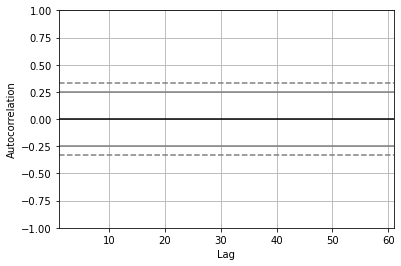

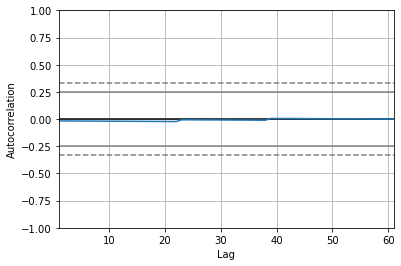

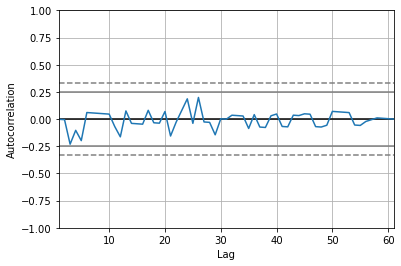

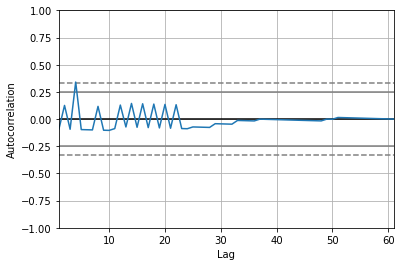

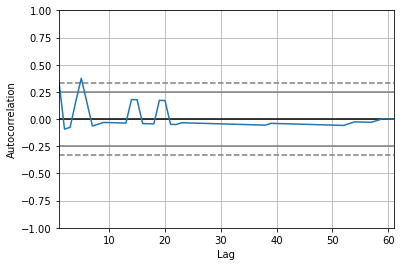

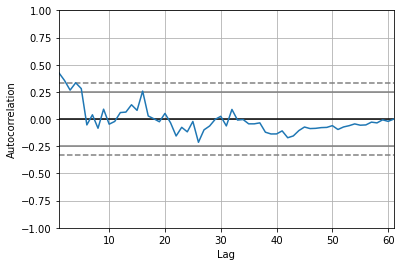

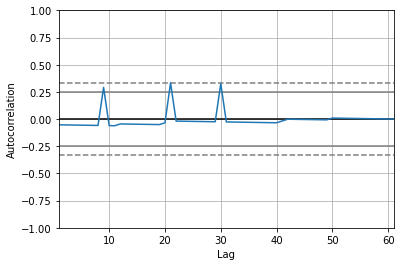

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


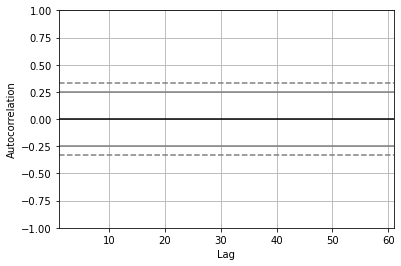

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


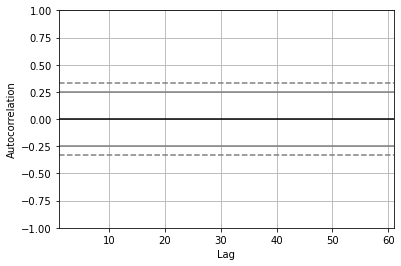

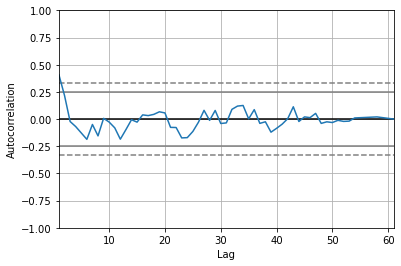

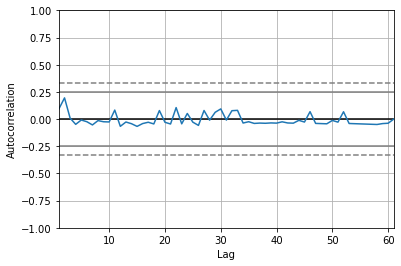

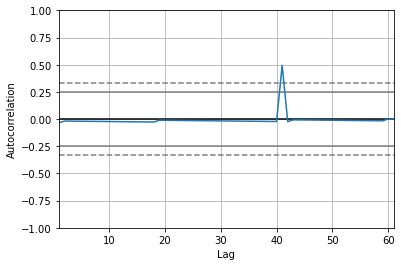

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


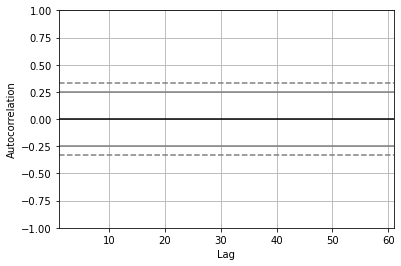

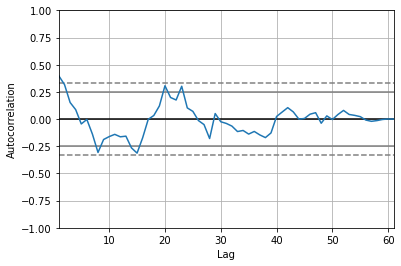

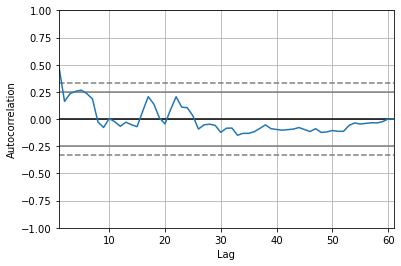

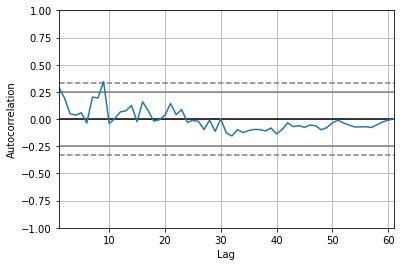

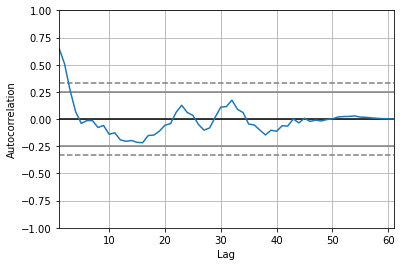

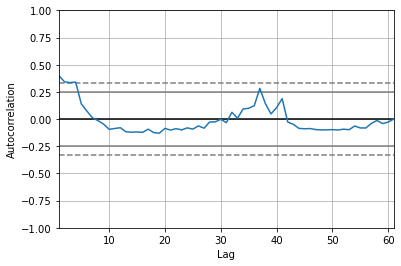

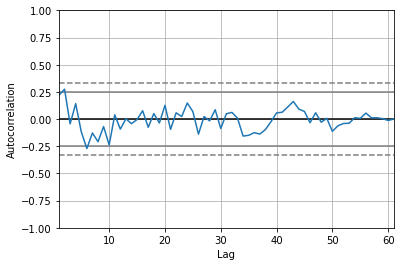

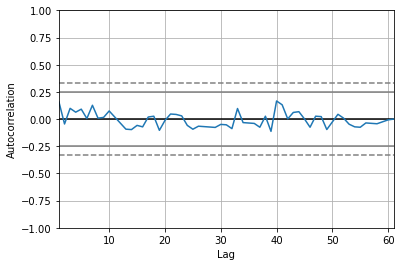

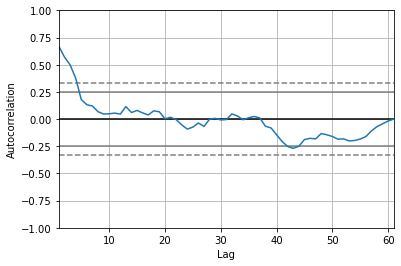

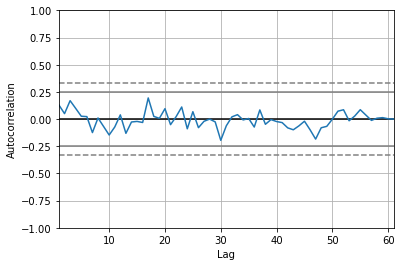

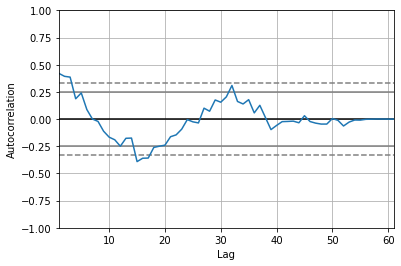

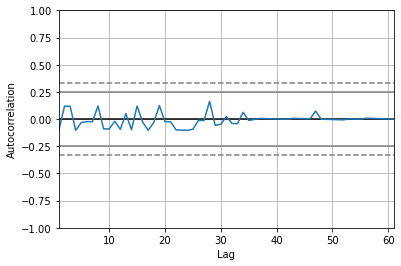

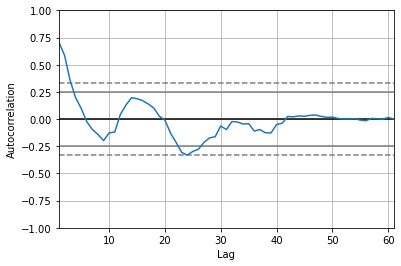

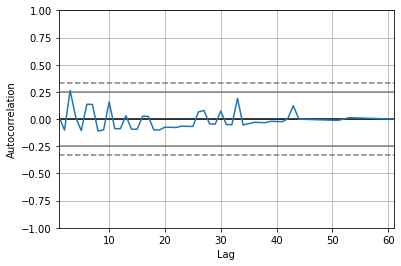

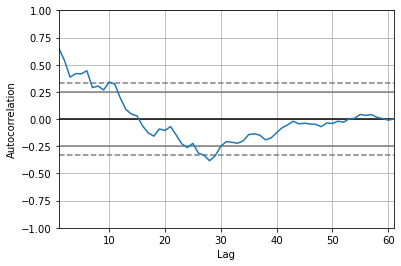

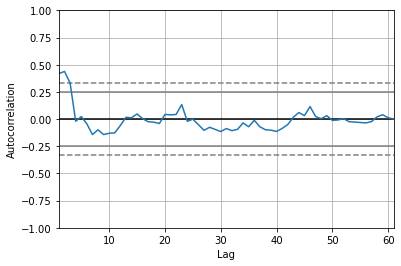

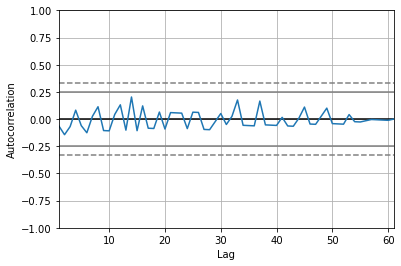

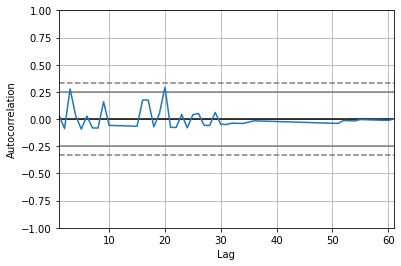

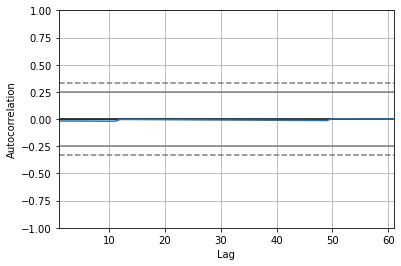

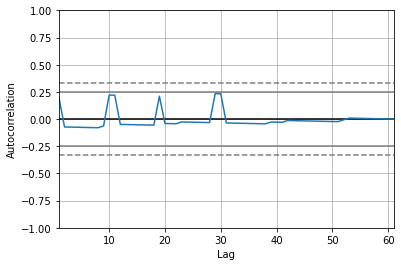

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


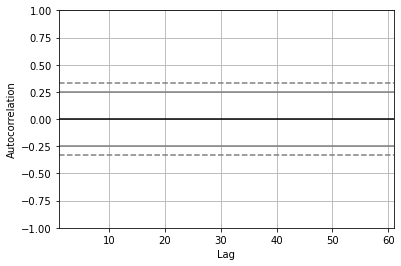

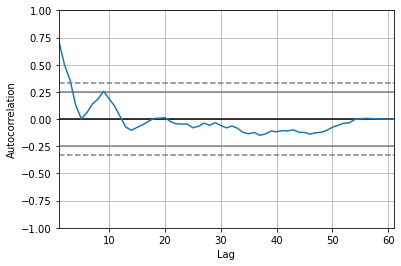

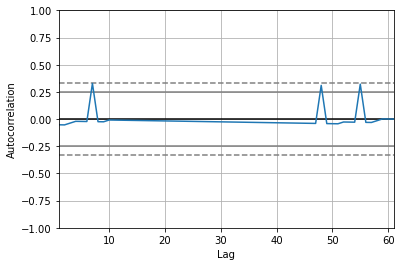

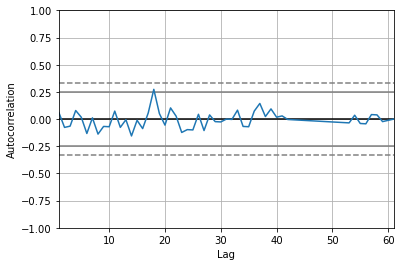

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


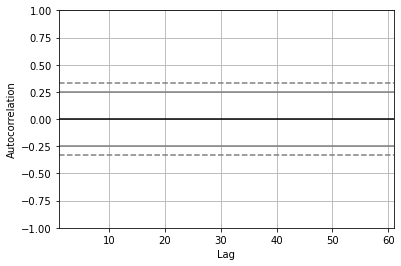

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


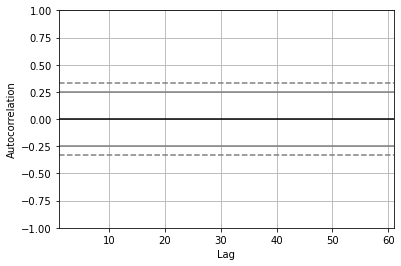

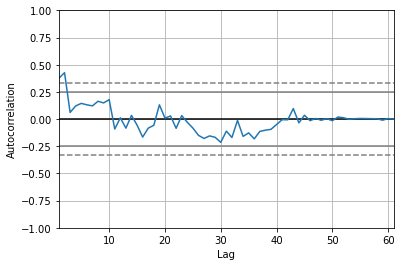

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


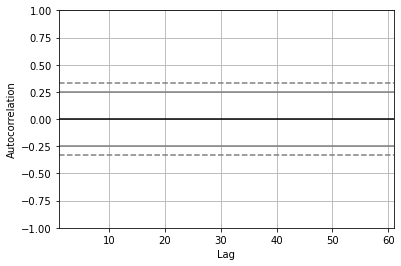

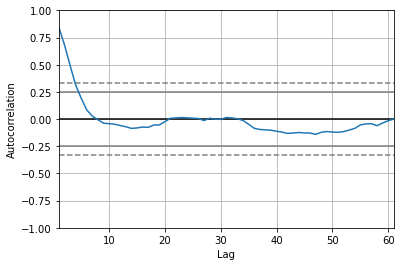

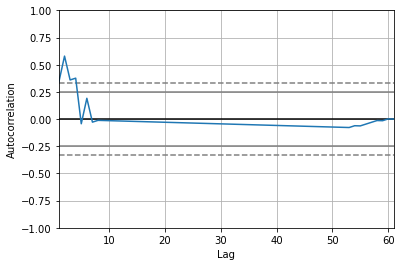

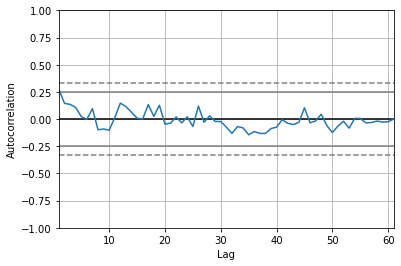

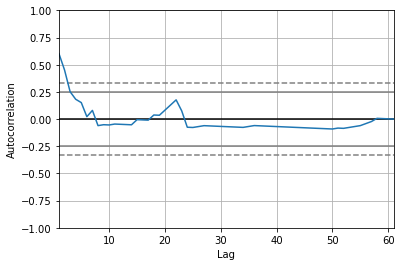

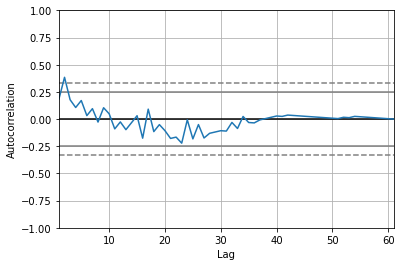

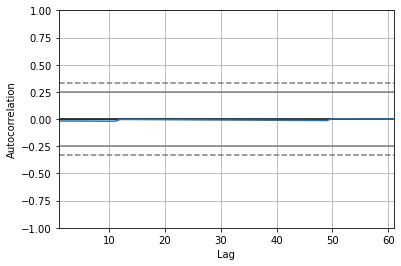

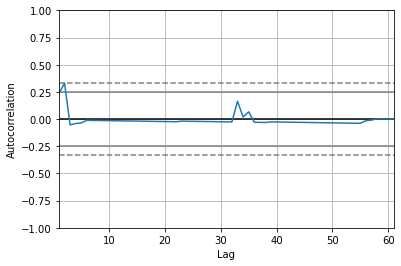

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


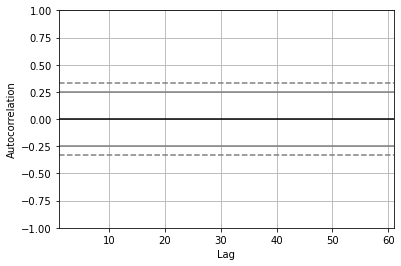

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


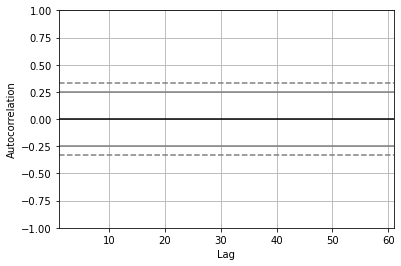

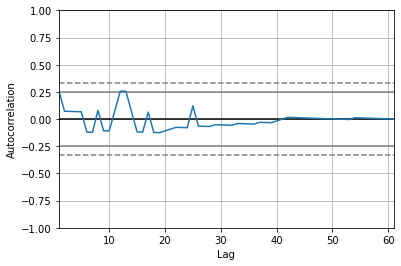

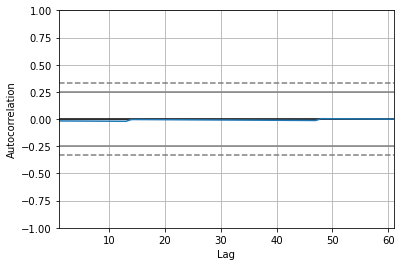

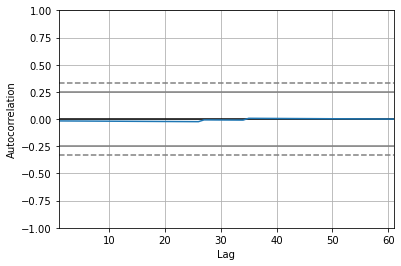

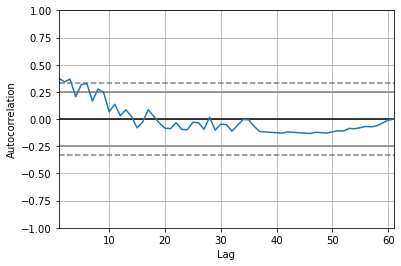

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


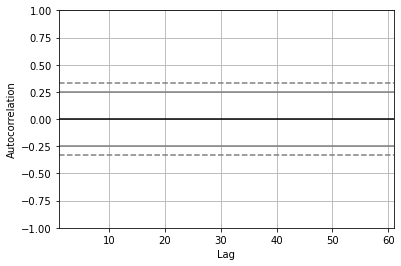

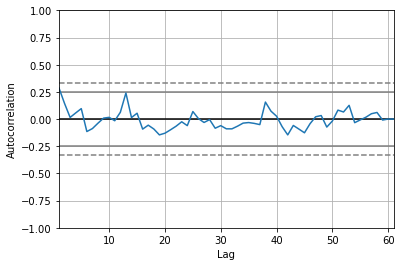

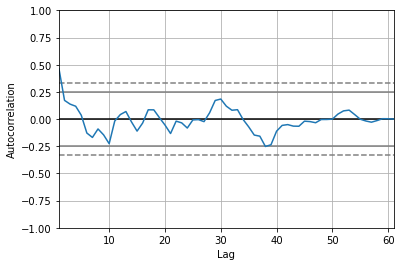

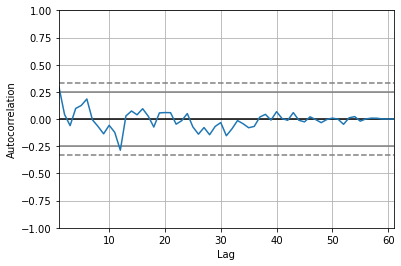

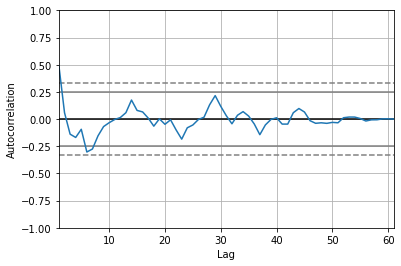

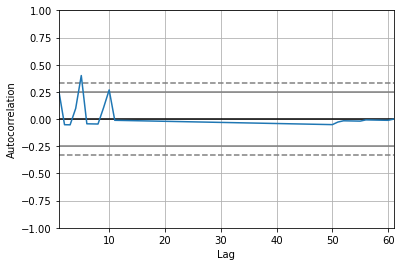

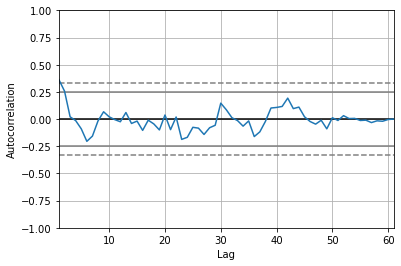

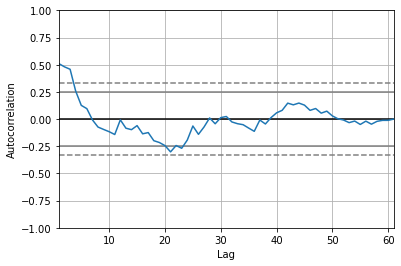

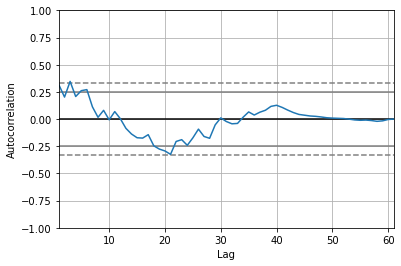

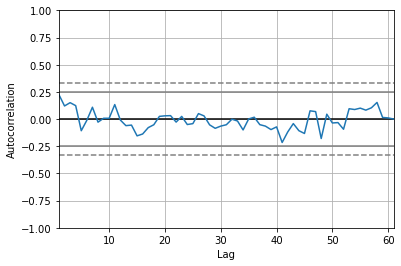

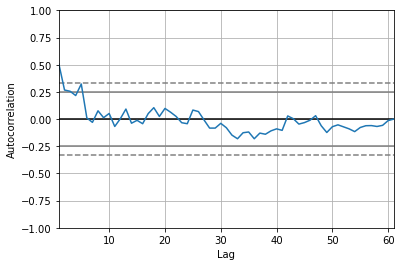

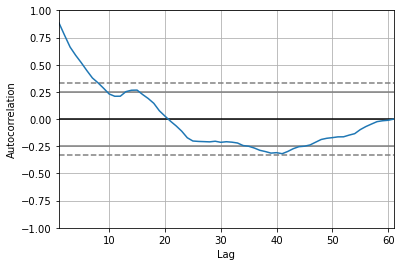

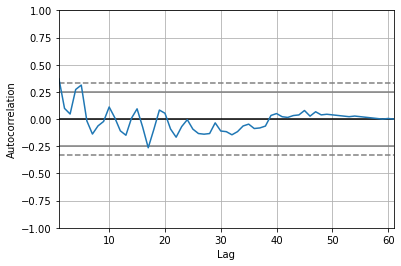

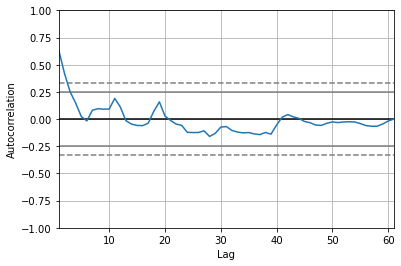

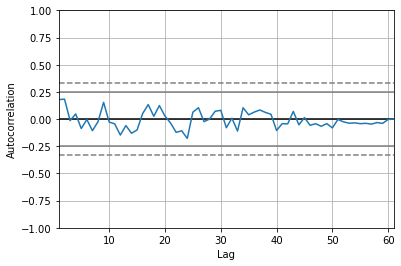

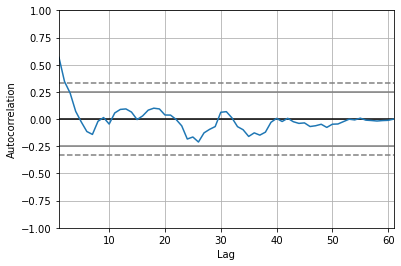

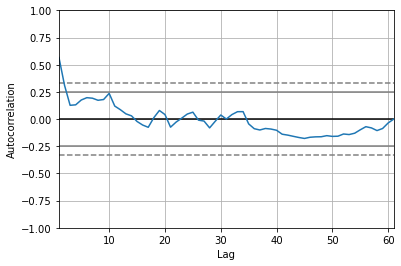

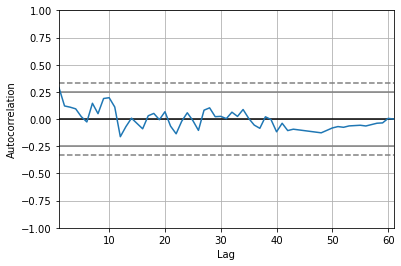

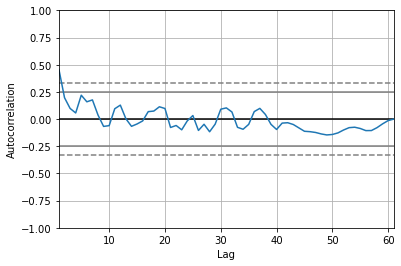

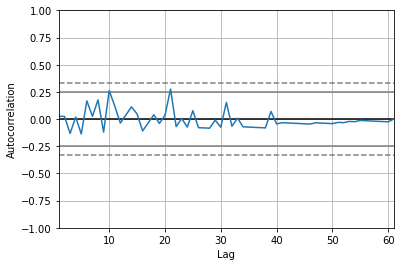

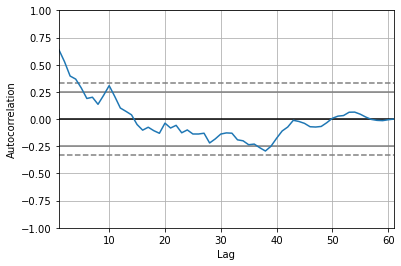

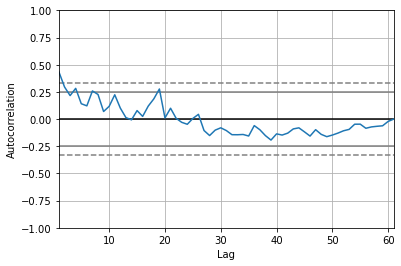

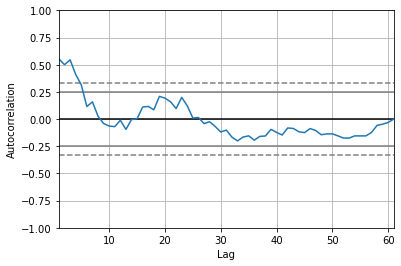

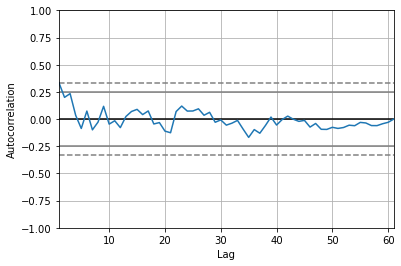

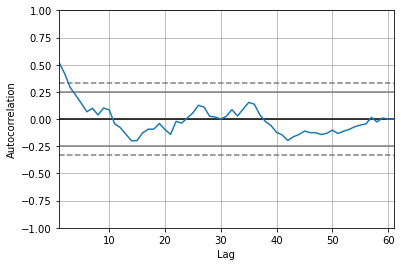

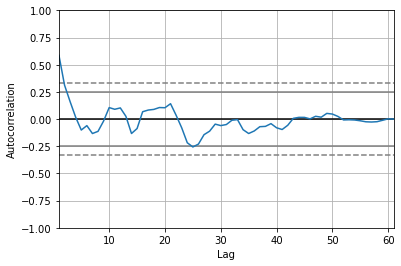

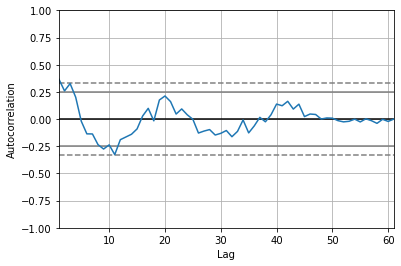

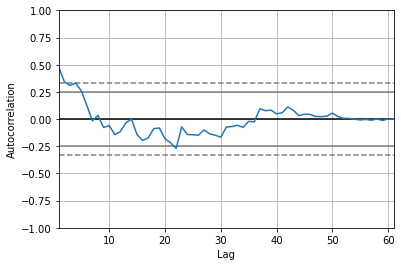

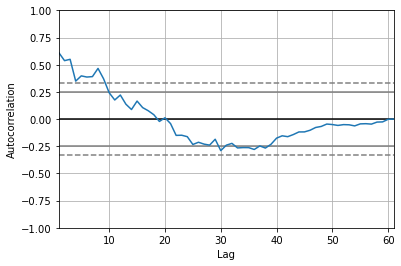

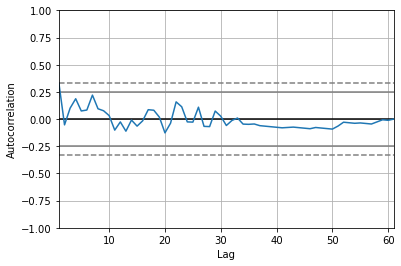

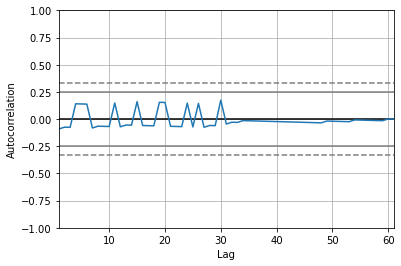

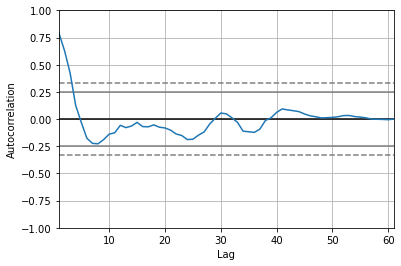

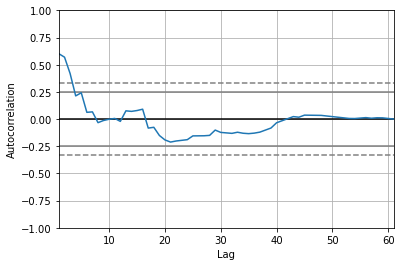

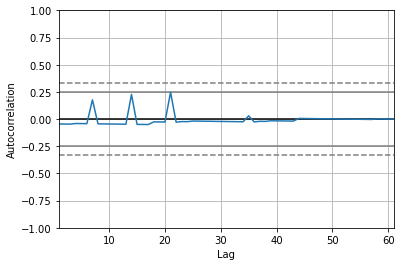

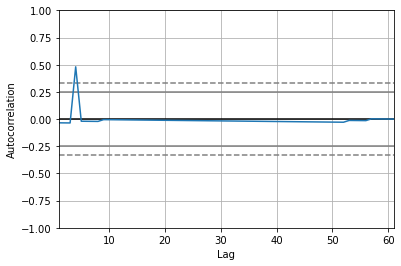

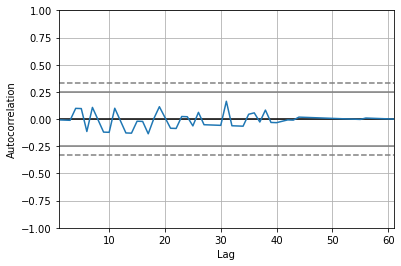

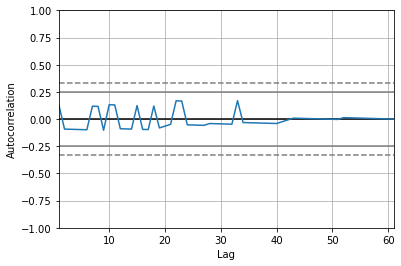

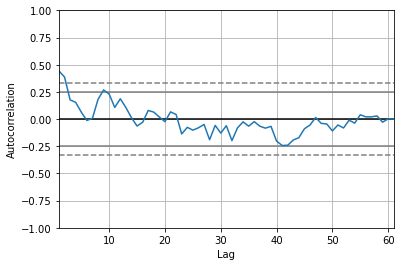

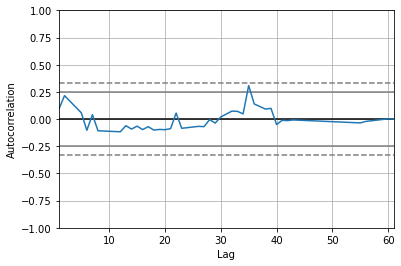

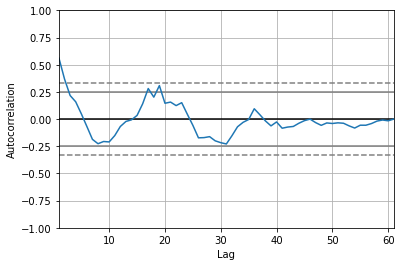

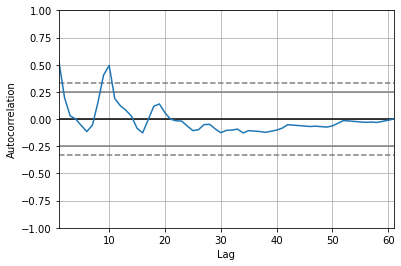

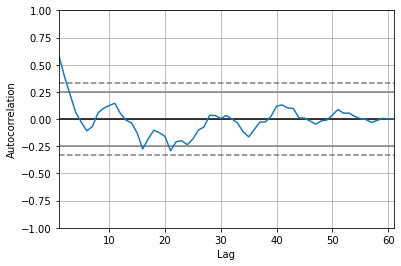

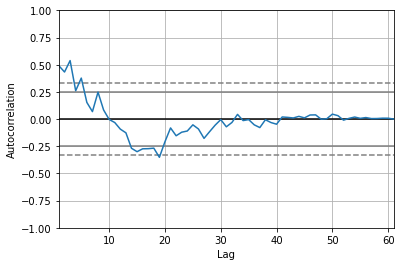

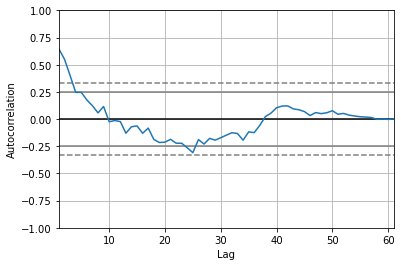

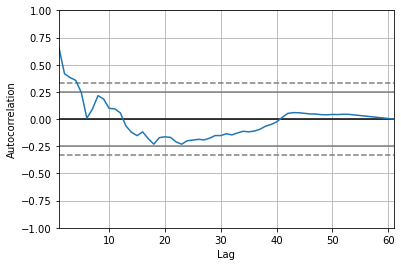

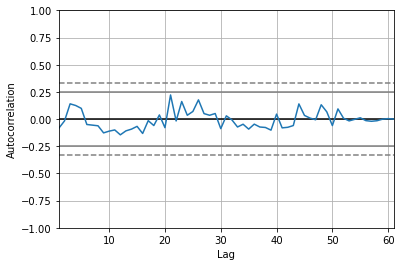

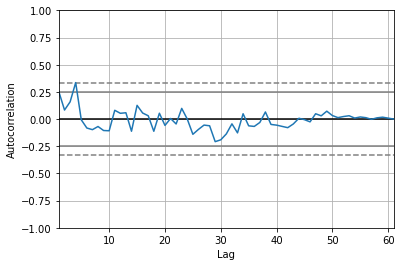

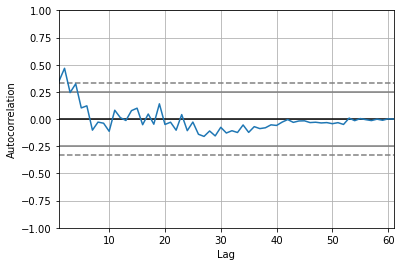

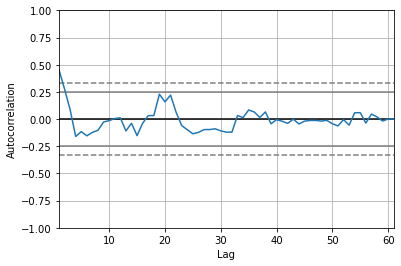

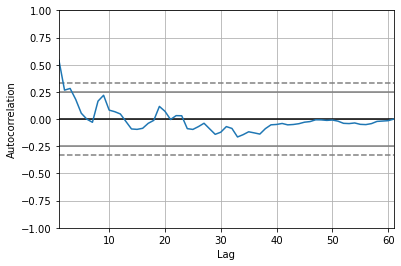

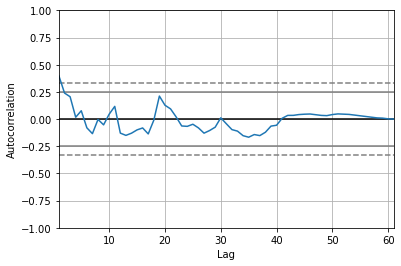

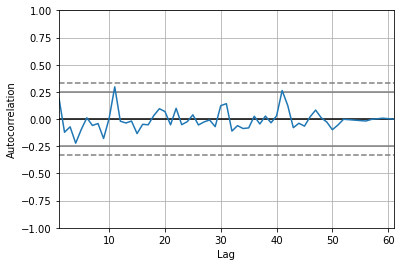

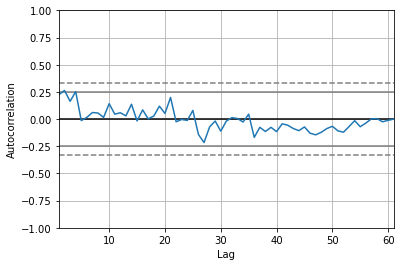

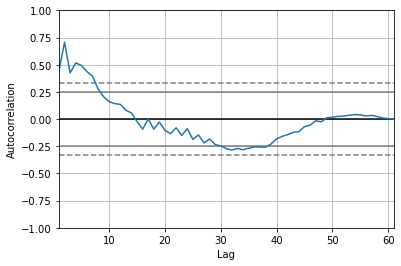

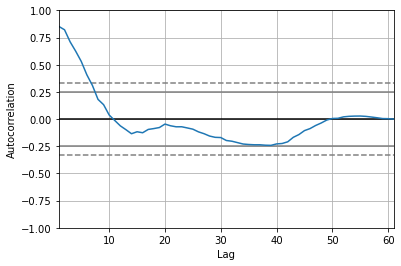

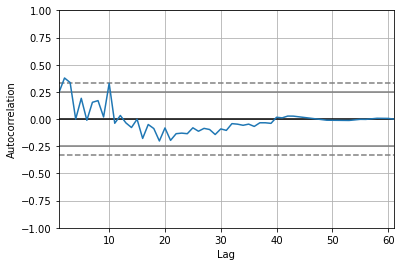

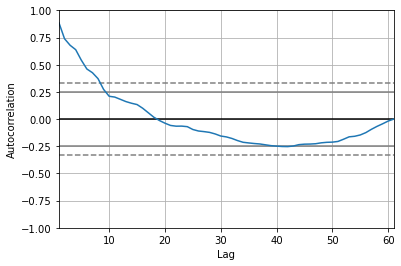

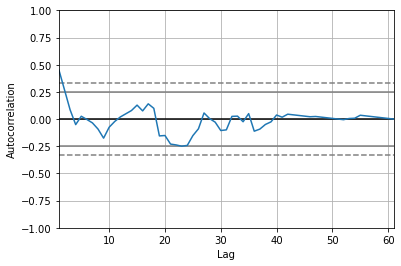

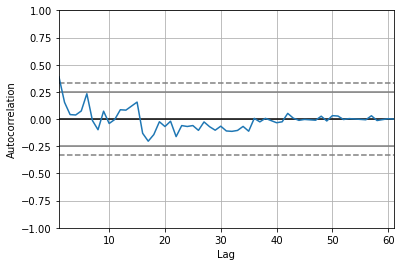

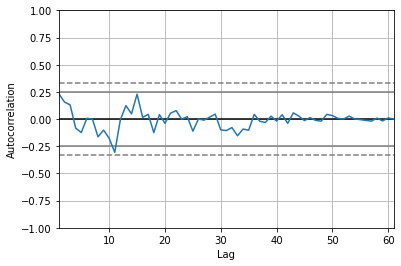

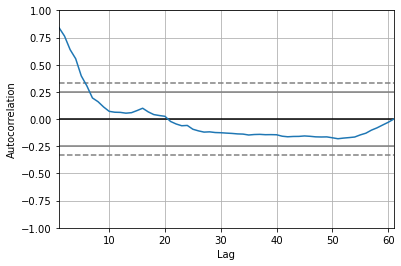

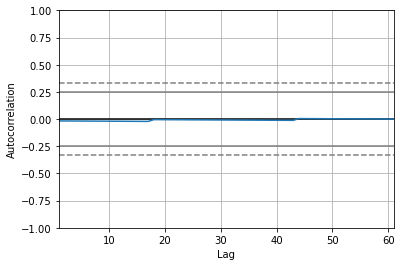

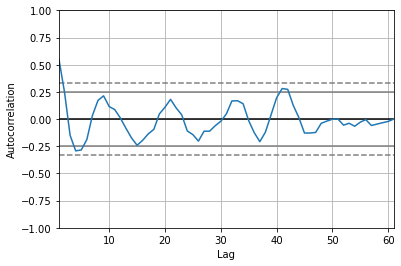

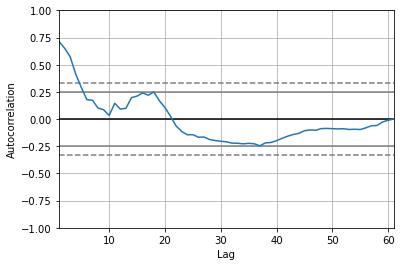

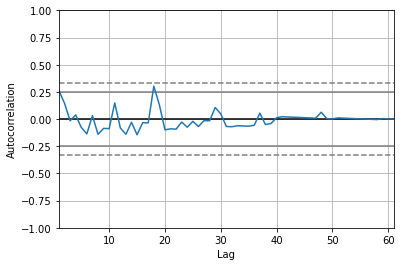

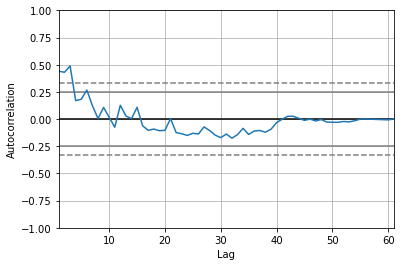

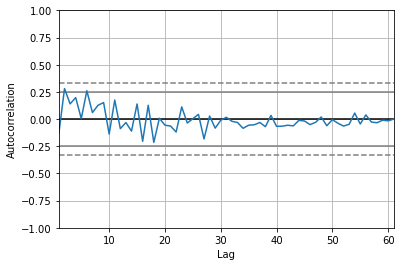

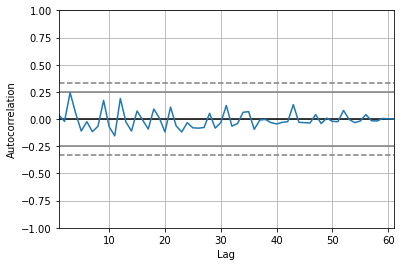

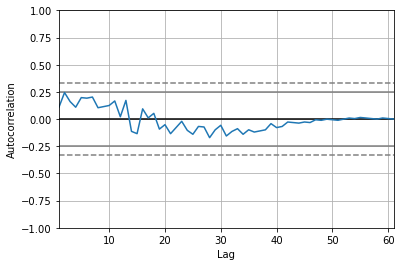

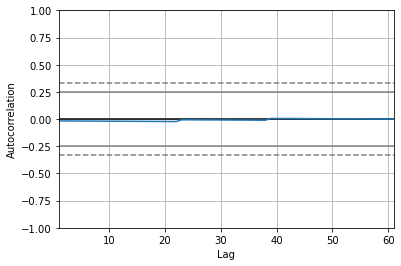

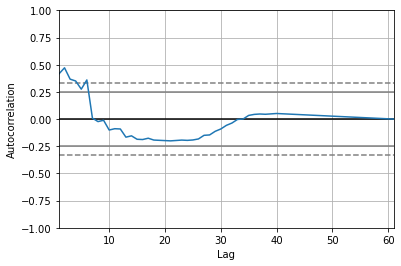

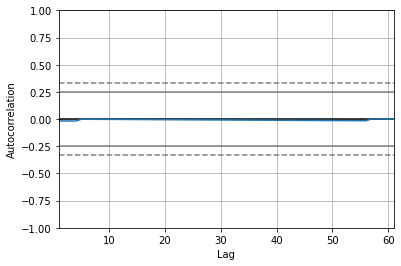

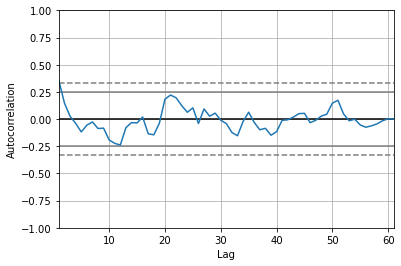

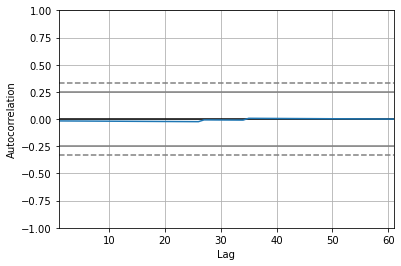

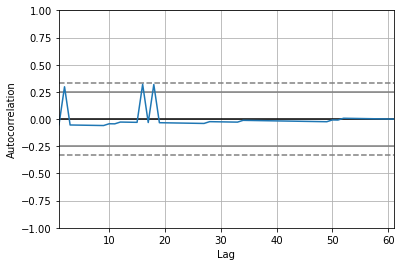

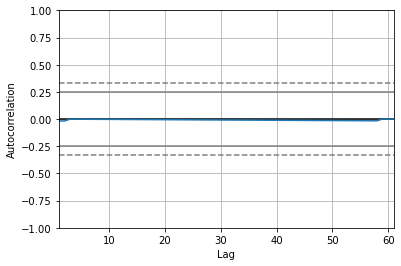

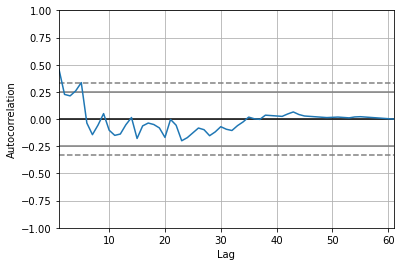

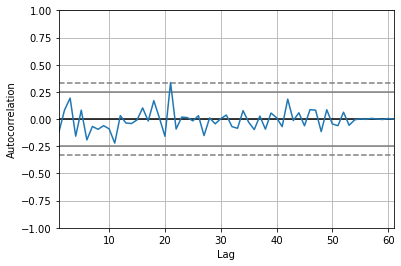

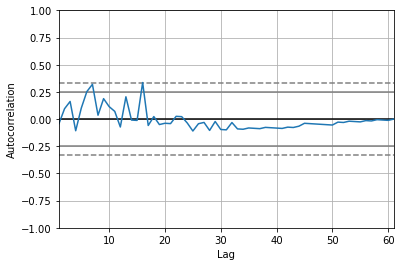

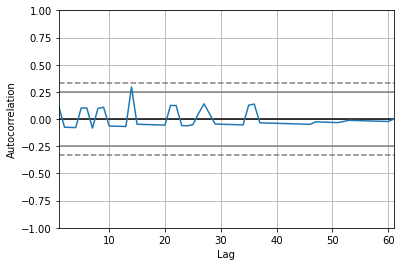

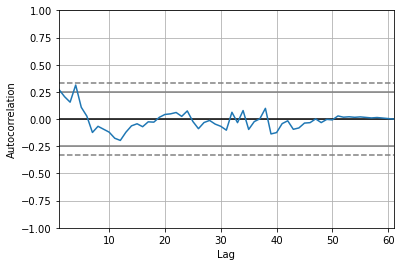

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


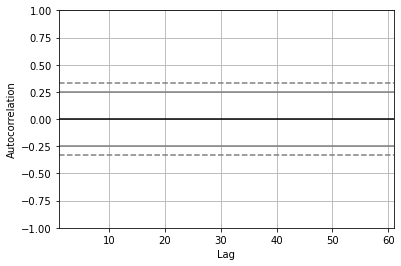

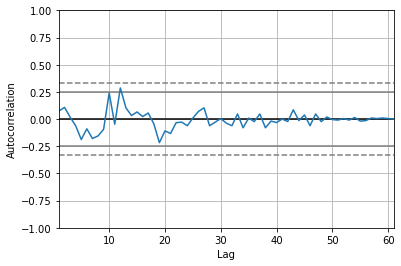

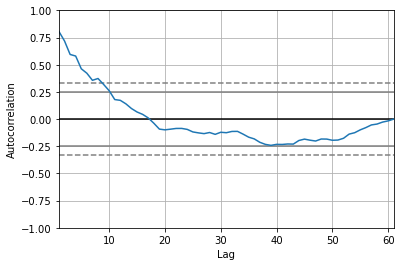

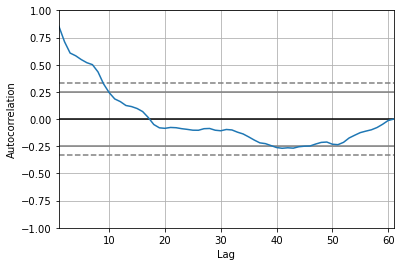

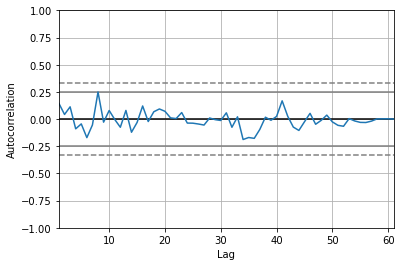

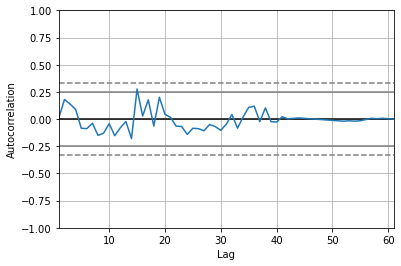

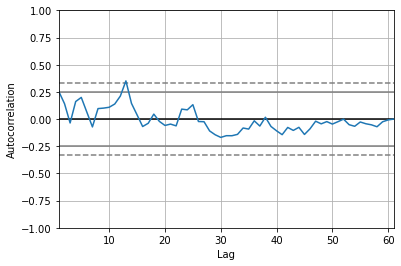

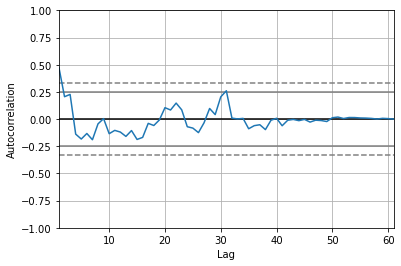

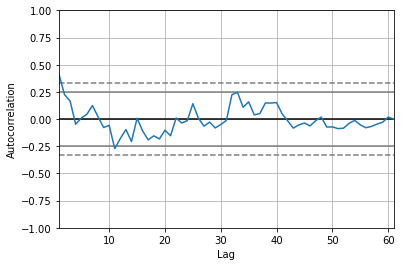

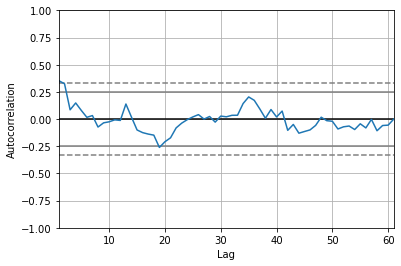

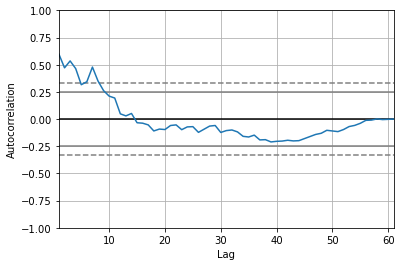

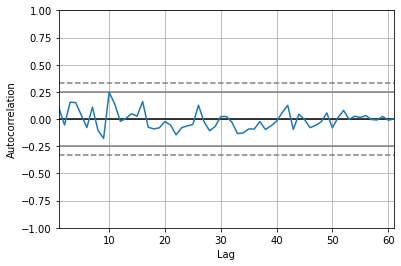

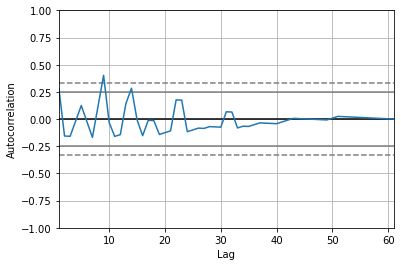

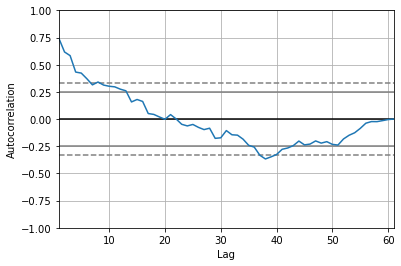

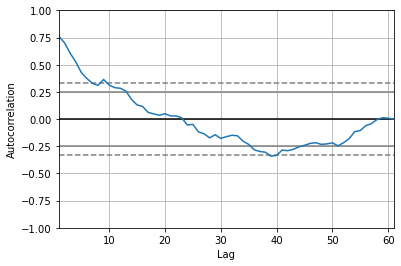

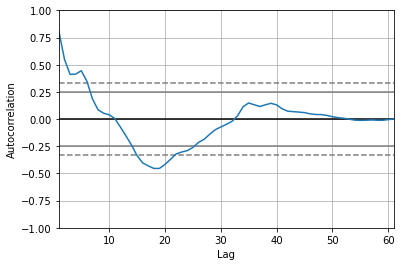

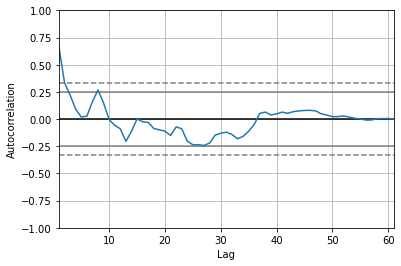

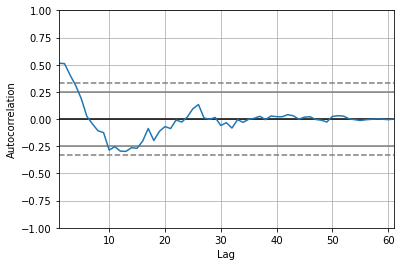

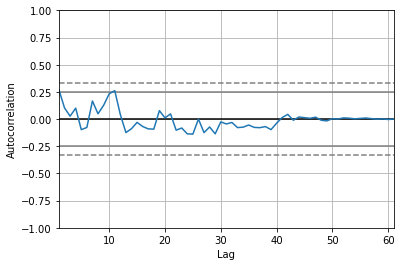

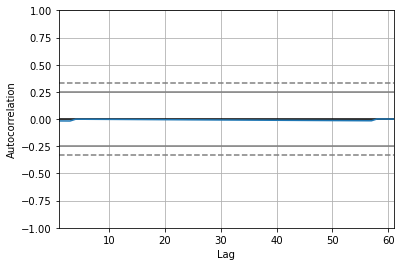

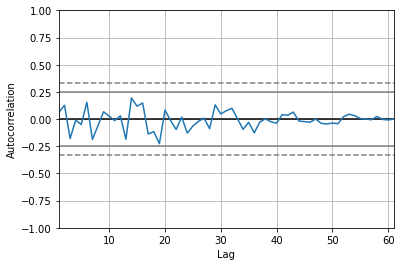

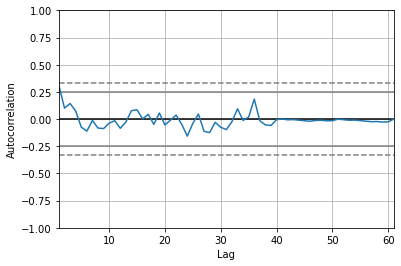

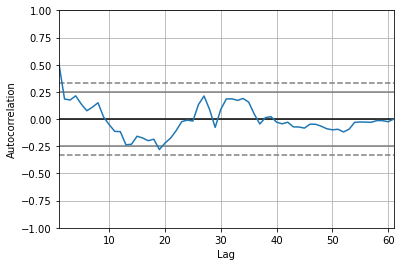

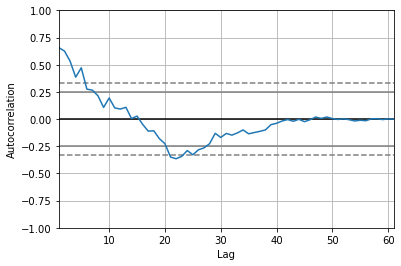

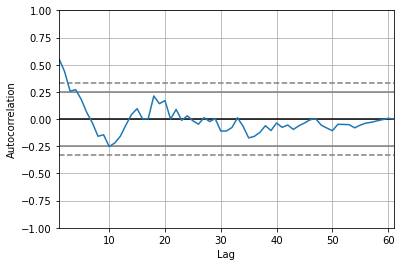

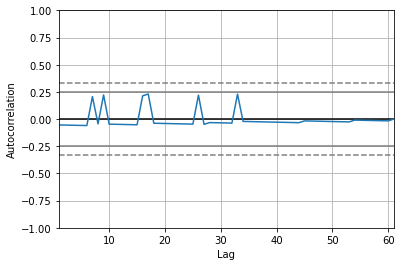

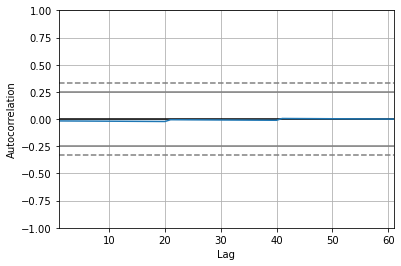

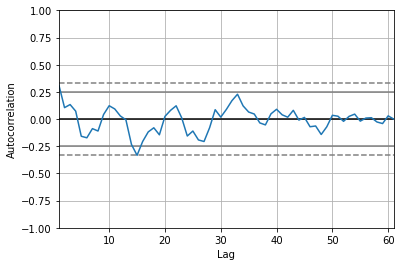

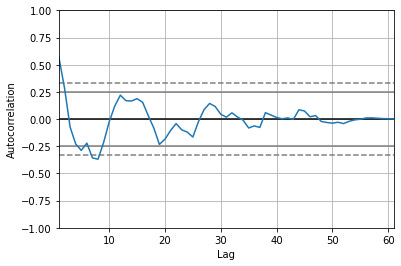

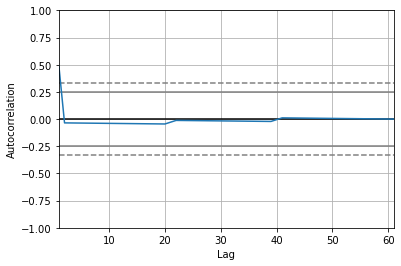

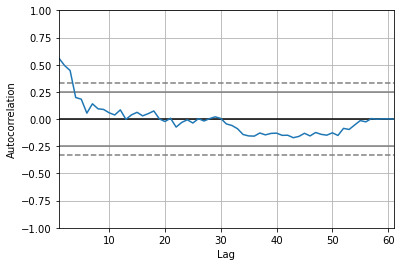

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


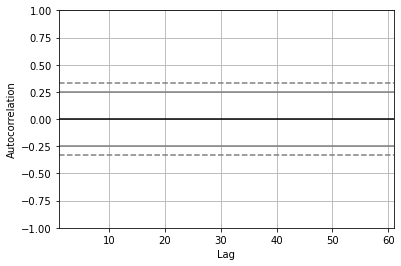

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


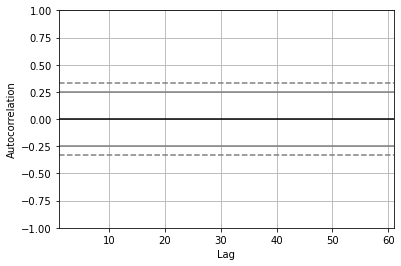

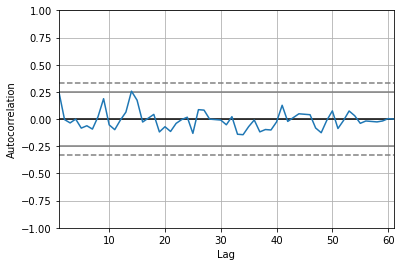

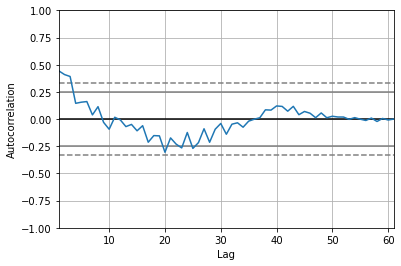

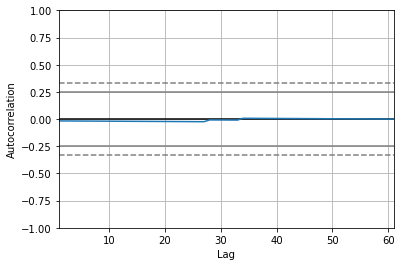

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


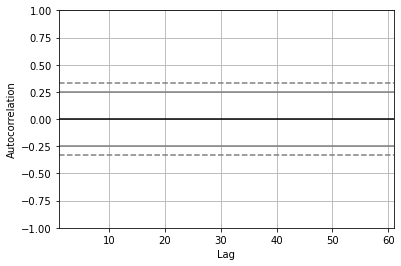

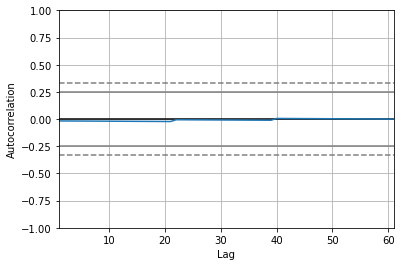

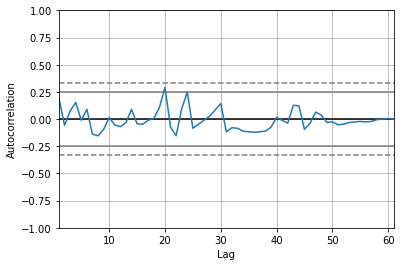

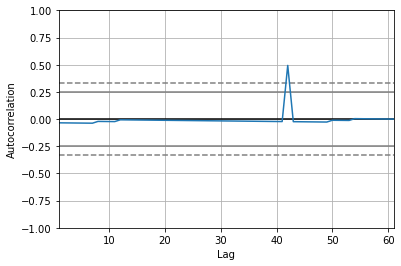

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


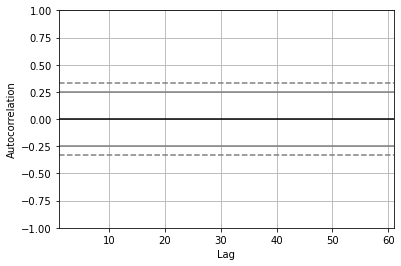

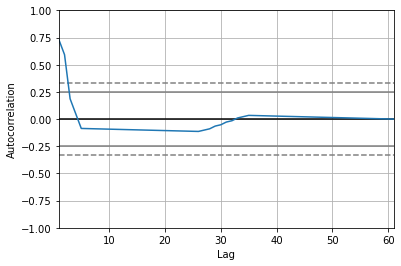

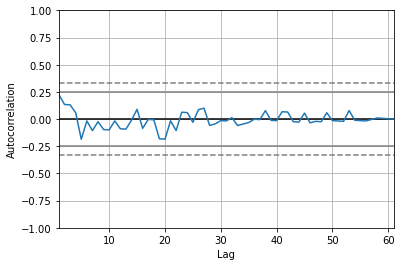

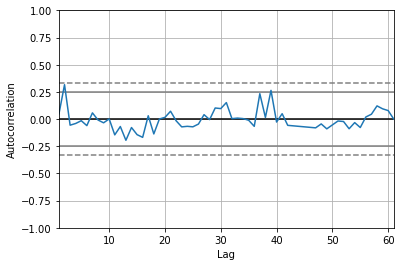

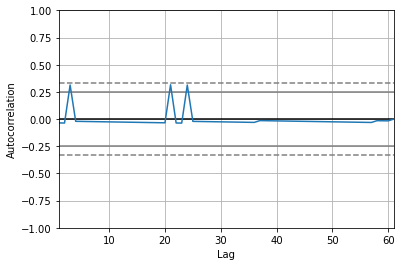

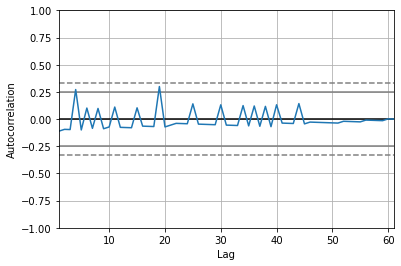

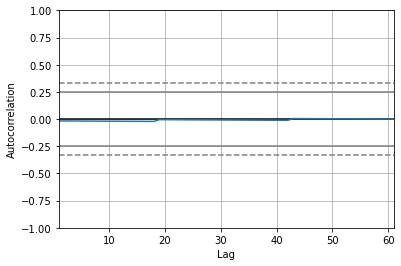

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


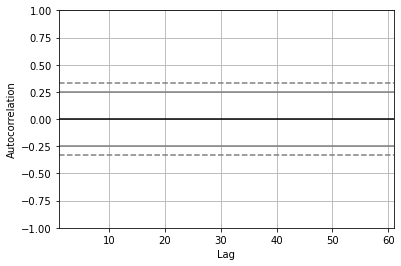

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


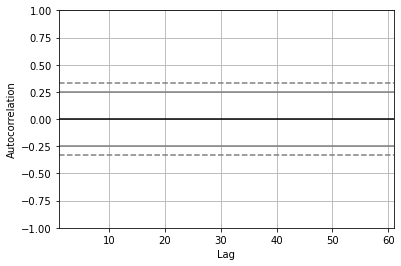

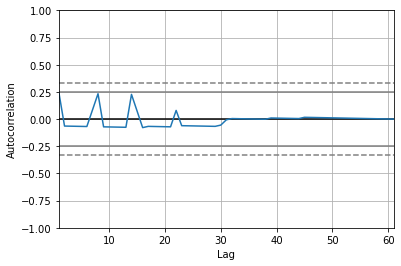

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


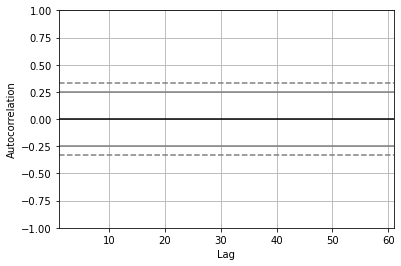

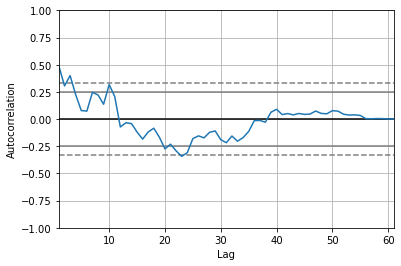

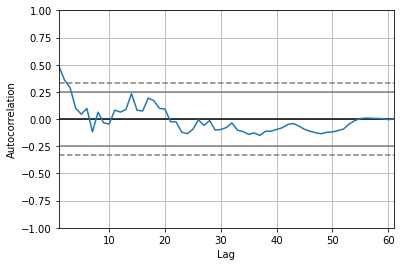

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


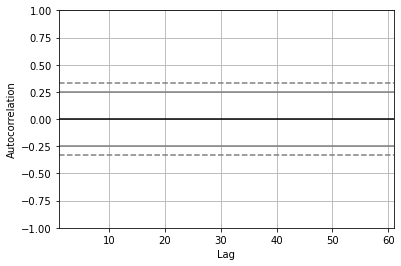

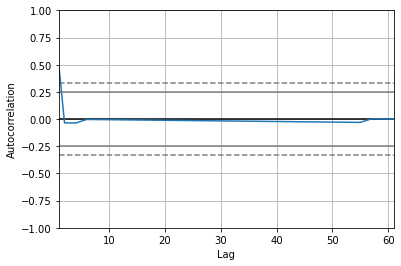

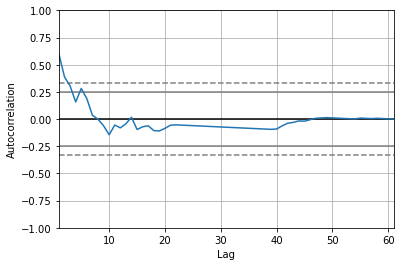

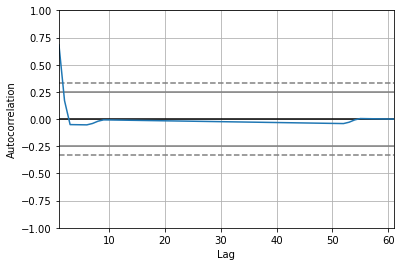

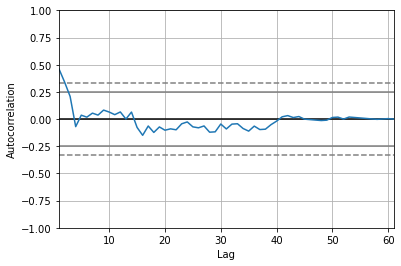

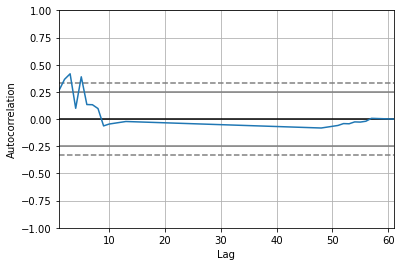

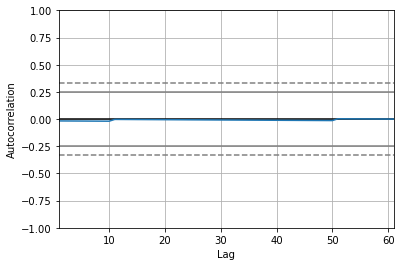

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


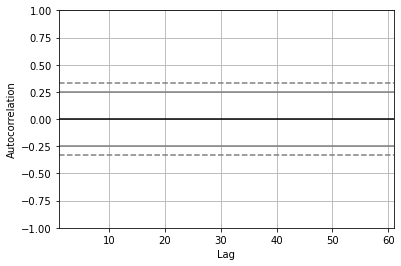

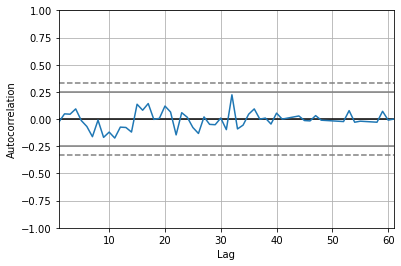

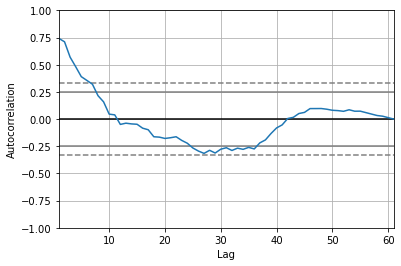

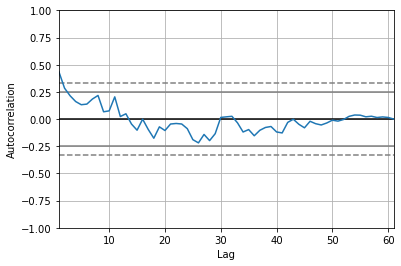

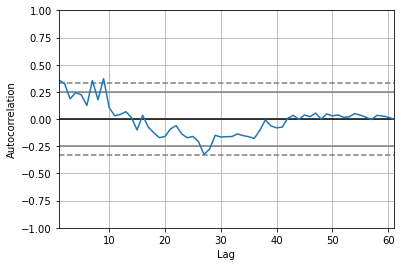

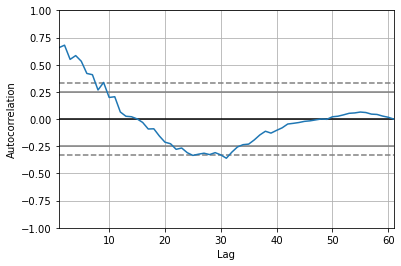

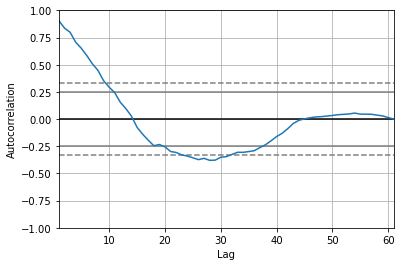

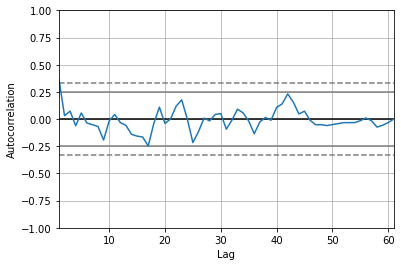

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


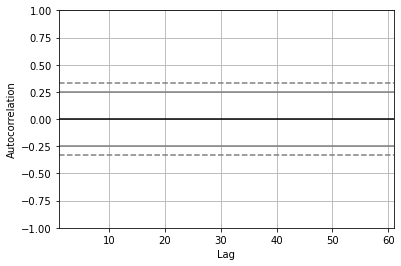

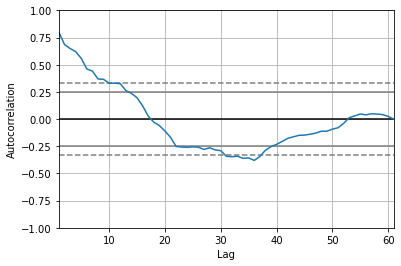

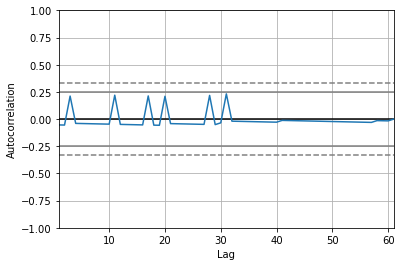

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


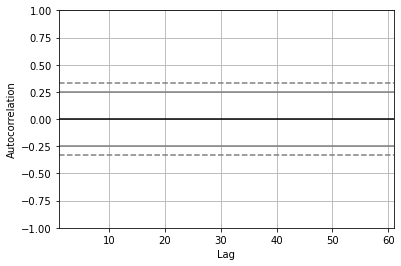

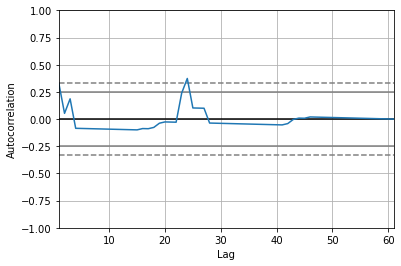

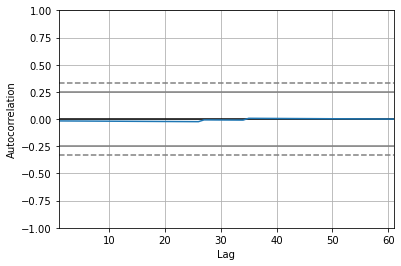

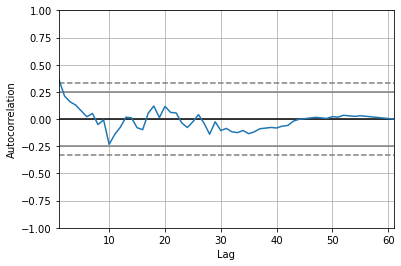

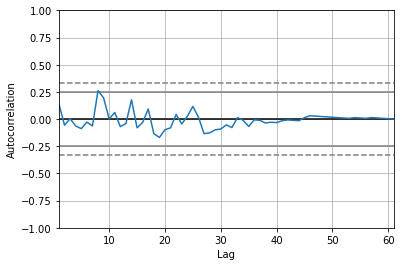

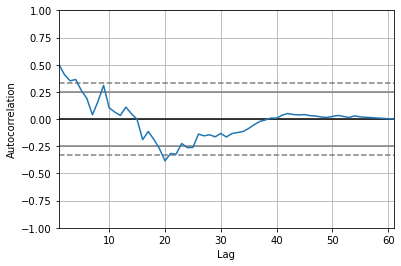

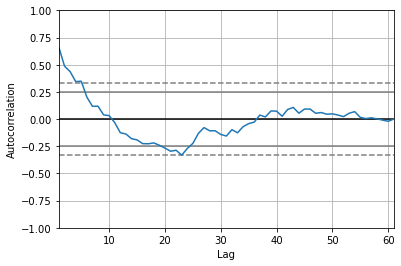

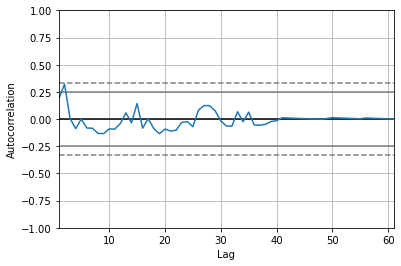

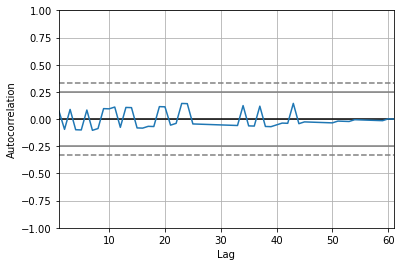

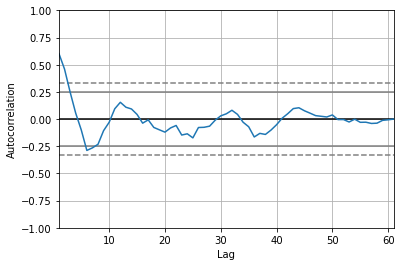

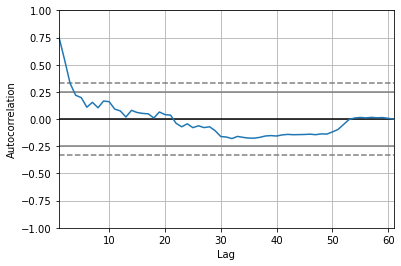

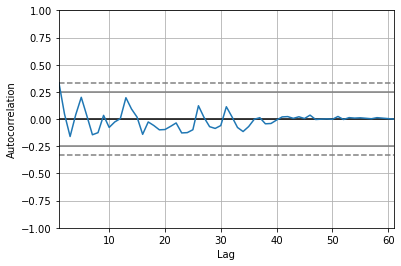

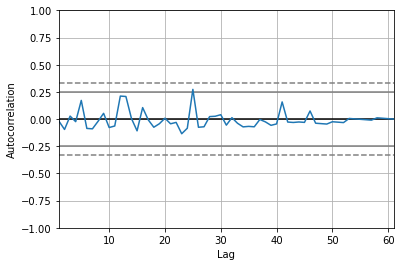

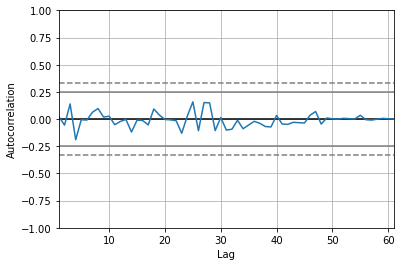

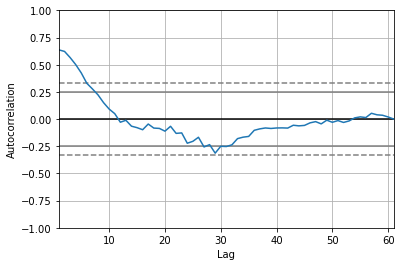

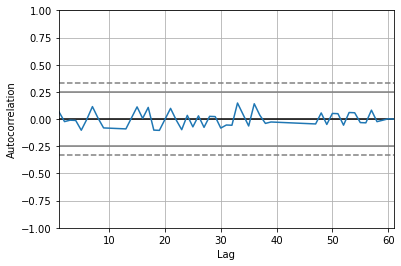

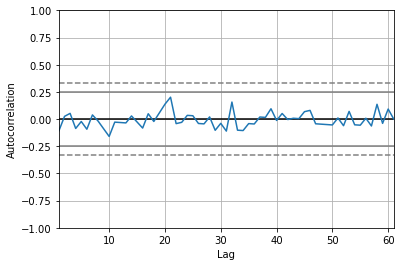

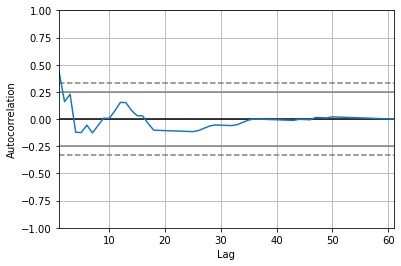

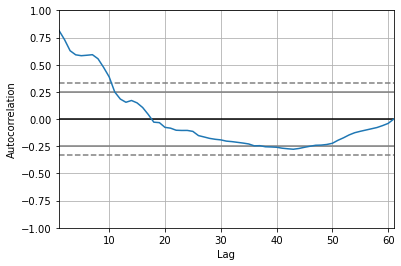

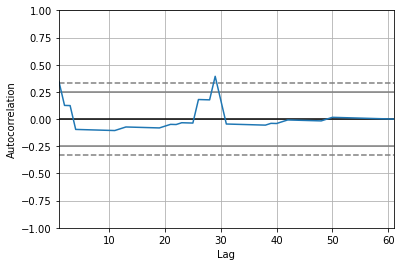

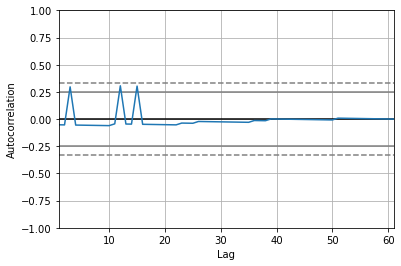

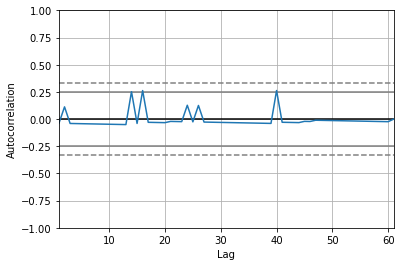

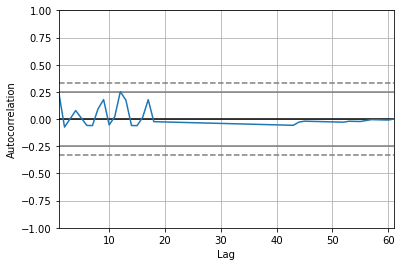

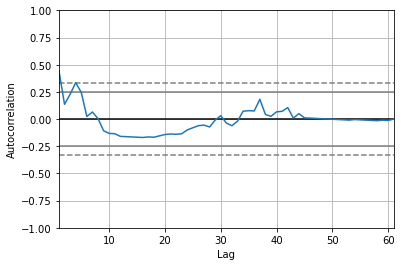

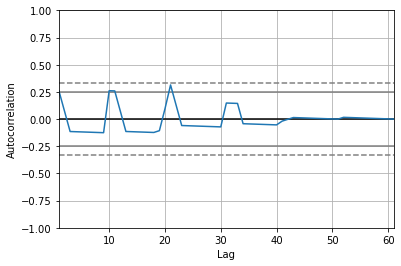

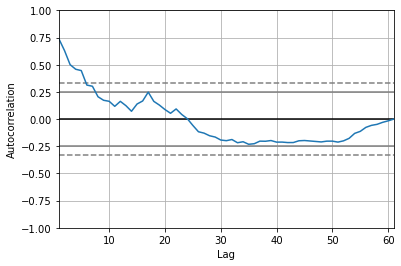

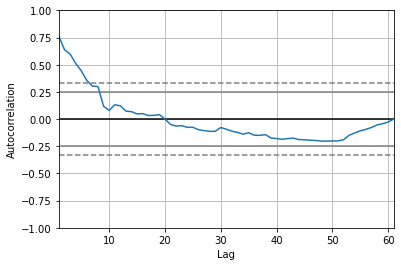

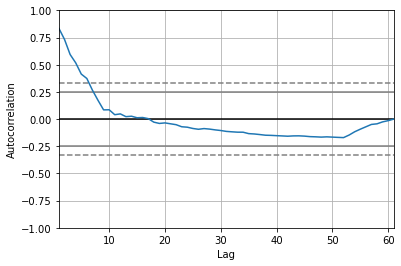

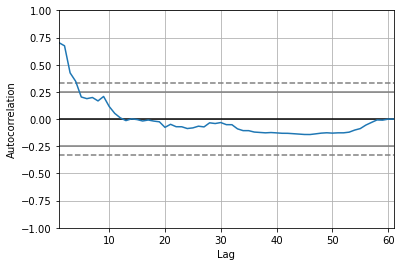

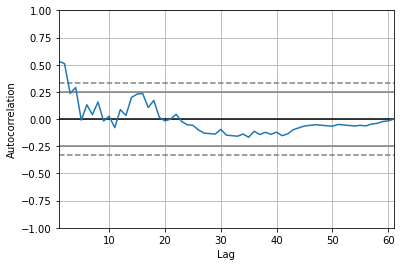

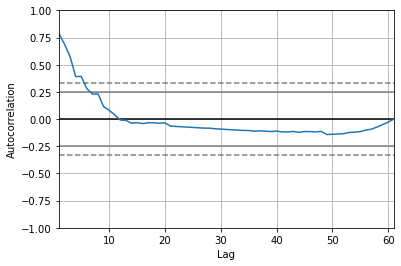

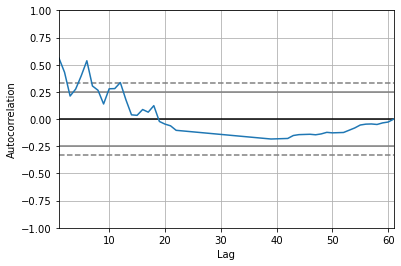

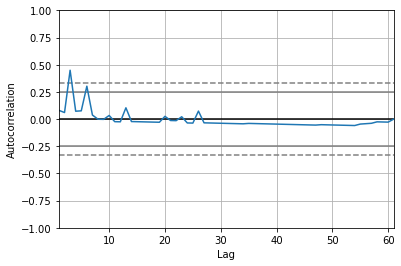

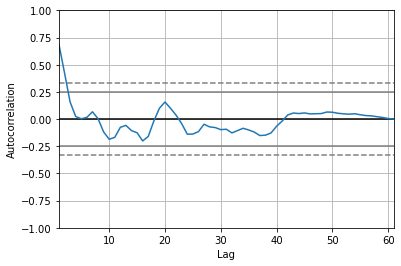

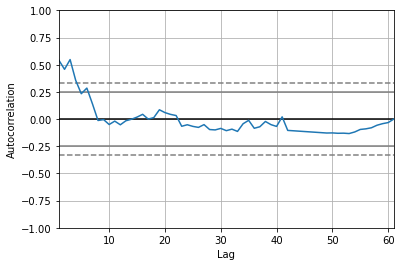

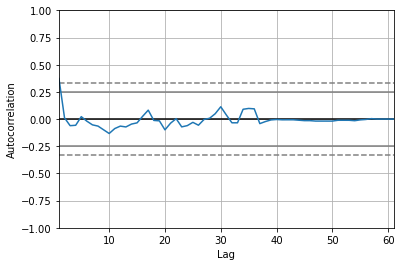

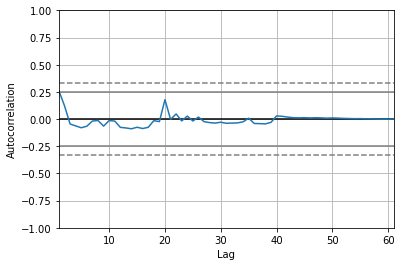

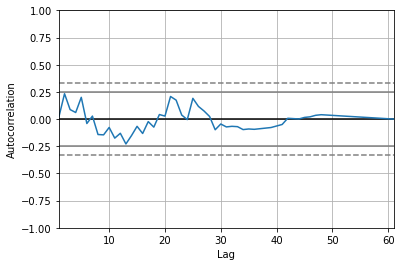

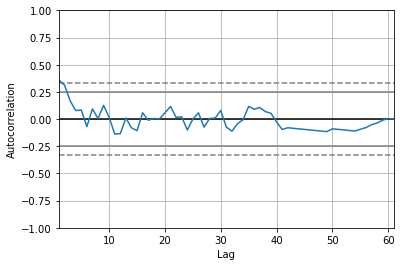

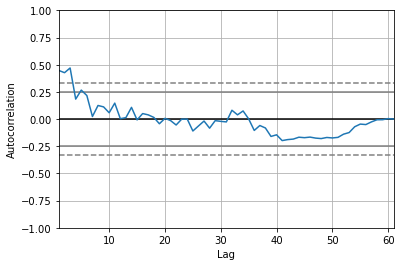

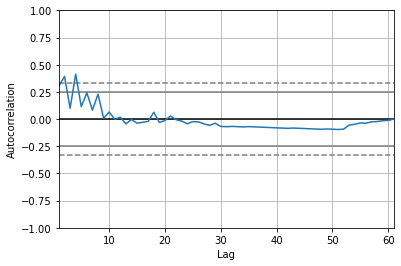

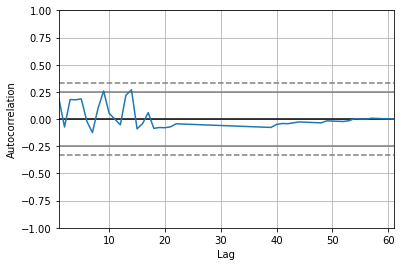

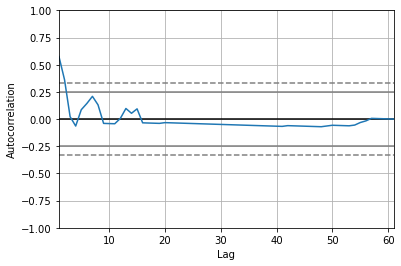

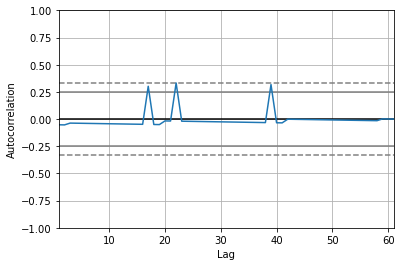

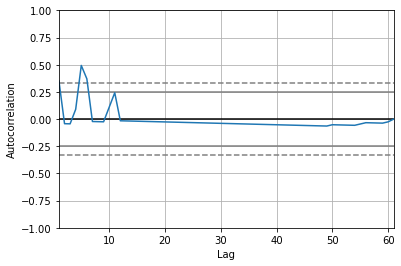

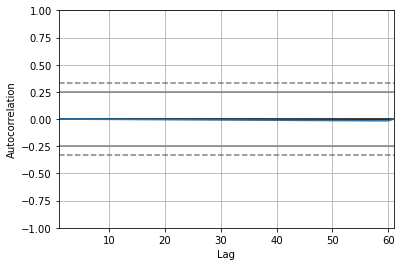

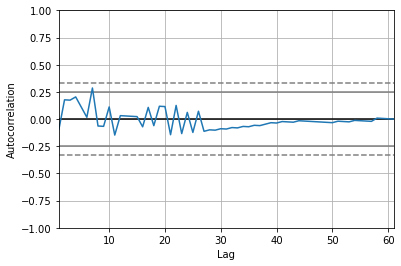

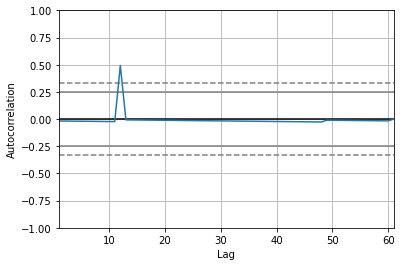

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


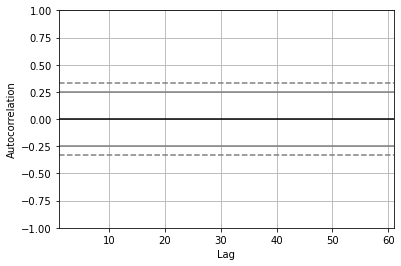

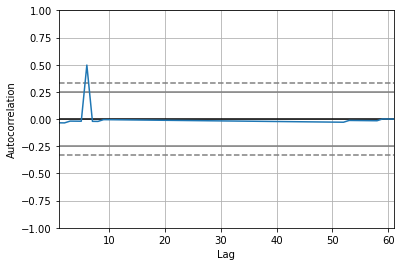

In [22]:
for i in D[12060.0].columns:
    autocorrelation_plot(D[12060.0][i])
    plt.show()

C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Jean-Baptiste\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3108: RuntimeWarning: divide by zero encountered in double_scalars
  test_statistic = np.sum(numer_resid) / np.sum(denom_resid)


                               SARIMAX Results                                
Dep. Variable:                  pc_14   No. Observations:                   61
Model:                 ARIMA(4, 1, 0)   Log Likelihood                  31.795
Date:                Mon, 03 May 2021   AIC                            -53.590
Time:                        16:57:13   BIC                            -43.118
Sample:                             0   HQIC                           -49.494
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7867      0.085     -9.244      0.000      -0.953      -0.620
ar.L2         -0.5806      0.108     -5.391      0.000      -0.792      -0.370
ar.L3         -0.3809      0.111     -3.425      0.0

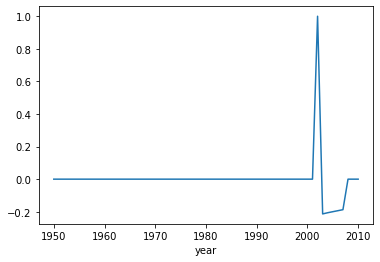

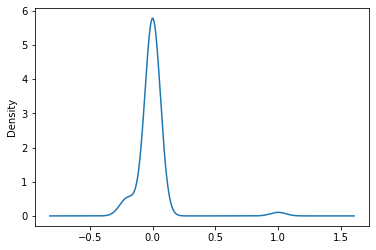

count    6.100000e+01
mean    -3.804956e-19
std      1.414459e-01
min     -2.133332e-01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
dtype: float64


In [23]:
# fit model
model = ARIMA(D[12060.0]['pc_14'], order=(4,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = model_fit.resid
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [24]:
log_df

Unnamed: 0  log_pc_1  log_pc_2  log_pc_4  log_pc_5  log_pc_7  log_pc_8  \
0             4  0.000000  0.000000  1.386294  0.693147       0.0  0.000000   
1             5  0.000000  0.000000  1.386294  0.693147       0.0  0.000000   
2             6  0.000000  0.000000  1.386294  0.000000       0.0  0.000000   
3             7  0.000000  0.000000  1.386294  0.693147       0.0  0.000000   
4             8  0.000000  0.000000  0.693147  0.693147       0.0  0.000000   
..          ...       ...       ...       ...       ...       ...       ...   
207         227  5.159055  0.693147  0.000000  0.000000       0.0  0.000000   
208         228  5.283204  0.693147  0.000000  0.693147       0.0  0.000000   
209         229  5.308268  0.693147  0.000000  0.693147       0.0  0.000000   
210         230  5.384495  0.693147  0.000000  0.693147       0.0  0.693147   
211         231  5.342334  0.693147  0.000000  0.693147       0.0  0.693147   

     log_pc_14  log_pc_15  log_pc_16  ...  log_pc_717  log_pc_718  log_pc_719  \
0          0.0   1.791759   1.609438  ...    0.000000    0.000000    0.000000   
1          0.0   1.791759   1.791759  ...    0.000000    0.000000    0.000000   
2          0.0   1.945910   1.791759  ...    0.000000    0.000000    0.000000   
3          0.0   1.791759   1.791759  ...    0.000000    0.000000    0.000000   
4          0.0   1.609438   1.386294  ...    0.000000    0.000000    0.000000   
..         ...        ...        ...  ...         ...         ...         ...   
207        0.0   1.386294   0.000000  ...    3.332205    2.944439    2.197225   
208        0.0   1.609438   0.693147  ...    3.465736    3.135494    2.197225   
209        0.0   1.609438   1.098612  ...    3.526361    3.178054    2.397895   
210        0.0   1.609438   1.098612  ...    3.583519    3.178054    2.397895   
211        0.0   1.386294   1.098612  ...    3.637586    3.401197    2.484907   

     log_pc_720  log_pc_725  log_pc_726  log_pc_800  log_pc_850   permno  year  
0      0.000000    0.000000    0.000000    0.000000    0.693147  12060.0  1954  
1      0.000000    0.000000    0.000000    0.000000    0.693147  12060.0  1955  
2      0.000000    0.000000    0.000000    0.000000    0.693147  12060.0  1956  
3      0.000000    0.000000    0.000000    0.000000    0.000000  12060.0  1957  
4      0.000000    0.000000    0.000000    0.000000    0.693147  12060.0  1958  
..          ...         ...         ...         ...         ...      ...   ...  
207    3.555348    2.397895    2.833213    0.693147    4.043051  64231.0  2006  
208    3.433987    2.397895    3.295837    1.098612    3.988984  64231.0  2007  
209    3.496508    2.708050    3.688879    1.609438    3.737670  64231.0  2008  
210    3.737670    2.772589    3.850148    1.945910    3.258097  64231.0  2009  
211    3.737670    3.091042    4.060443    1.945910    1.098612  64231.0  2010  

[212 rows x 401 columns]

In [25]:
SMA_df

Unnamed: 0   permno  SMA_pc_1  SMA_pc_2  SMA_pc_4  SMA_pc_5  SMA_pc_7  \
0             4  12060.0       0.0       0.0       3.0       1.0       0.0   
1             5  12060.0       0.0       0.0       3.0       1.0       0.0   
2             6  12060.0       0.0       0.0       3.0       0.0       0.0   
3             7  12060.0       0.0       0.0       3.0       1.0       0.0   
4             8  12060.0       0.0       0.0       1.0       1.0       0.0   
..          ...      ...       ...       ...       ...       ...       ...   
207         227  64231.0     173.0       1.0       0.0       0.0       0.0   
208         228  64231.0     196.0       1.0       0.0       1.0       0.0   
209         229  64231.0     201.0       1.0       0.0       1.0       0.0   
210         230  64231.0     217.0       1.0       0.0       1.0       0.0   
211         231  64231.0     208.0       1.0       0.0       1.0       0.0   

     SMA_pc_8  SMA_pc_14  SMA_pc_15  ...  SMA_pc_716  SMA_pc_717  SMA_pc_718  \
0         0.0        0.0        5.0  ...         0.0         0.0         0.0   
1         0.0        0.0        5.0  ...         0.0         0.0         0.0   
2         0.0        0.0        6.0  ...         0.0         0.0         0.0   
3         0.0        0.0        5.0  ...         0.0         0.0         0.0   
4         0.0        0.0        4.0  ...         0.0         0.0         0.0   
..        ...        ...        ...  ...         ...         ...         ...   
207       0.0        0.0        3.0  ...        65.0        27.0        18.0   
208       0.0        0.0        4.0  ...        67.0        31.0        22.0   
209       0.0        0.0        4.0  ...        49.0        33.0        23.0   
210       1.0        0.0        4.0  ...        49.0        35.0        23.0   
211       1.0        0.0        3.0  ...        52.0        37.0        29.0   

     SMA_pc_719  SMA_pc_720  SMA_pc_725  SMA_pc_726  SMA_pc_800  SMA_pc_850  \
0           0.0         0.0         0.0         0.0         0.0         1.0   
1           0.0         0.0         0.0         0.0         0.0         1.0   
2           0.0         0.0         0.0         0.0         0.0         1.0   
3           0.0         0.0         0.0         0.0         0.0         0.0   
4           0.0         0.0         0.0         0.0         0.0         1.0   
..          ...         ...         ...         ...         ...         ...   
207         8.0        34.0        10.0        16.0         1.0        56.0   
208         8.0        30.0        10.0        26.0         2.0        53.0   
209        10.0        32.0        14.0        39.0         4.0        41.0   
210        10.0        41.0        15.0        46.0         6.0        25.0   
211        11.0        41.0        21.0        57.0         6.0         2.0   

     year  
0    1954  
1    1955  
2    1956  
3    1957  
4    1958  
..    ...  
207  2006  
208  2007  
209  2008  
210  2009  
211  2010  

[212 rows x 401 columns]